<p align="center">
  <font face="Arial" size="6" color="#1A5276">
    <b>Aplicación del Procesamiento de Lenguaje Natural para el Análisis de Opiniones Técnicas, Estudios RCA y Reportes de Mantenimiento en Maquinaria Industrial</b>
  </font>
</p>



<font face="Arial" size="4">

<b><font color="#1A5276">Objetivo del Proyecto</font></b><br><br>

Este proyecto tiene como objetivo aplicar técnicas de <font color="#117A65"><b>Procesamiento de Lenguaje Natural (PLN)</b></font> para analizar y extraer conocimiento útil a partir de los reportes de turno recolectados por medios electrónicos, textos escritos por técnicos sobre el funcionamiento y fallos de maquinaria industrial.<br><br>

A través de modelos como <font color="#1A5276"><b>LDA</b></font> y herramientas de <font color="#117A65">limpieza</font>, <font color="#117A65">lematización</font> y <font color="#117A65">visualización</font>, se busca identificar patrones, temas recurrentes y áreas críticas en los procesos operativos, aportando valor a la toma de decisiones en <font color="#1A5276"><b>mantenimiento industrial</b></font>.

</font>


El documento Reporte de turno cuenta con las siguientes columans principales recolectadas por medio de Microsoft Forms

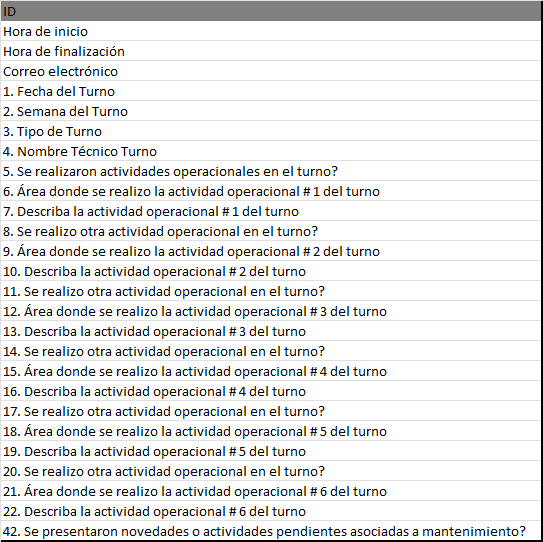

<p>
  <font face="Arial" size="5" color="#1A5276"><b>Instalación de Componentes Requeridos</b></font>
</p>




<h2 style="color:#2E86C1;">Instalación de Componentes Requeridos</h2>

<p style="font-size:16px;">
Se requiere instalar y configurar <strong style="color:#1ABC9C;">spaCy</strong>, una biblioteca de <strong>Procesamiento de Lenguaje Natural (PLN)</strong> que permite realizar tareas como:
</p>

<ul style="font-size:16px;">
  <li>🔹 <strong>Tokenización</strong>: dividir el texto en palabras o frases.</li>
  <li>🔹 <strong>Lematización</strong>: reducir palabras a su forma base.</li>
  <li>🔹 <strong>Análisis gramatical</strong>: identificar funciones sintácticas como sujeto, verbo, complemento, etc.</li>
</ul>

<p style="font-size:16px;">
También se descarga el modelo <code style="color:#E67E22;">es_core_news_sm</code>, entrenado específicamente para el idioma español. Este modelo incluye:
</p>

<ul style="font-size:16px;">
  <li>✅ Vocabulario en español</li>
  <li>✅ Reglas gramaticales</li>
  <li>✅ Estadísticas lingüísticas</li>
</ul>

<p style="font-size:16px;">
Las siguientes líneas de código instalan todo lo necesario:
</p>


In [ ]:
!pip install -U spacy
!python -m spacy download es_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.6
    Uninstalling spacy-3.8.6:
      Successfully uninstalled spacy-3.8.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 79.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<p>
  <font face="Arial" size="5" color="#1A5276"><b>Importación del archivo <i>Reporte_turno01</i> desde GitHubs</b></font>
</p>

<p style="color:white; font-family:Arial;">
  Se importa el archivo <span style="color:#58D68D;"><b>Reporte_turno01.csv</b></span> desde el repositorio de GitHub disponible en el siguiente enlace:<br>
  <span style="color:#58D68D;"><a href="https://github.com/EpinzonS/PLN-Turnos-Mantenimiento.git" target="_blank">https://github.com/EpinzonS/PLN-Turnos-Mantenimiento.git</a></span>.<br><br>
  El archivo contiene los <span style="color:#58D68D;">reportes técnicos de turno</span> que serán analizados utilizando herramientas de <span style="color:#58D68D;">Procesamiento de Lenguaje Natural (PLN)</span>.
</p>


In [ ]:
# Importar el archivo xls Reporte_turno01 - si genera error cargar el archivo a google colab manualmente
from google.colab import files
uploaded = files.upload()


Saving Reporte_Turno01.xlsx to Reporte_Turno01 (1).xlsx


<font face="Arial" size="4">

<b><font color="#1A5276">Importación de Pandas y Lectura del Archivo</font></b><br><br>

Se utiliza la biblioteca <font color="#117A65"><b>pandas</b></font> para trabajar con datos estructurados y facilitar su manipulación.<br><br>

Con esta herramienta, se lee la tabla contenida en el archivo Excel y se almacena en un <font color="#117A65"><b>DataFrame</b></font> llamado <font color="#117A65"><b>df</b></font> para su posterior análisis y procesamiento.

</font>


Cargar el archivo .xls en un DataFrame

In [ ]:
import pandas as pd

# Crear un data frame co el archivo de reports de turno
df = pd.read_excel("/content/Reporte_Turno01.xlsx")

# Visualizar las primeras filas para revisar
df.head()


,ID,Hora de inicio,Hora de finalización,Correo electrónico,1. Fecha del Turno,2. Semana del Turno,3. Tipo de Turno,4. Nombre Técnico Turno,5. Se realizaron actividades operacionales en el turno?,6. Área donde se realizo la actividad operacional # 1 del turno,...,56. TAG del equipo del pendiente # 3 para mantenimiento,57. Descripción del equipo del pendiente # 3 para mantenimiento,58. Describa de la actividad pendiente # 3 para mantenimiento,"59. Si requiere cambio de repuesto o elemento; por favor indique marca, referencia u otra información relevante",60. Se tiene otra novedad para el departamento de mantenimiento?,61. Área donde se encuentra el pendiente de mantenimiento # 4 del turno,62. TAG del equipo del pendiente # 4 para mantenimiento,63. Descripción del equipo del pendiente # 4 para mantenimiento,64. Describa de la actividad pendiente # 4 para mantenimiento,"65. Si requiere cambio de repuesto o elemento; por favor indique marca, referencia u otra información relevante"
0,10,2022-05-13 06:17:43,2022-05-13 06:29:08,anonymous,2022-05-12,18,Noche (7:00 P.M a 7:00 A.M),Oscar Padilla,Si,Nave Carbón,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,2022-05-16 18:52:01,2022-05-16 20:01:10,anonymous,2022-05-16,19,Dia (7:00 A.M a 7:00 P.M),Freddy Mancipe,Si,Torre Precalcinadora y Horno,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,2022-05-17 06:34:30,2022-05-17 06:43:57,anonymous,2022-05-16,20,Noche (7:00 P.M a 7:00 A.M),Jhionner Chaparro,Si,Molienda de Carbón,...,Revisión analizador de gases camara de humo.,Analizador con picos de No y So2,Se revisan fugas y se realiza limpieza a la so...,Equipo en observación,Si,Molienda de Cemento,Filtro principal,Filtro presenta fallo de bus,"Se revisa comunicación en campo, en cada uno d...",En observación
3,13,2022-05-17 18:07:16,2022-05-17 18:19:27,anonymous,2022-05-17,19,Dia (7:00 A.M a 7:00 P.M),Freddy Mancipe,Si,Molienda de Carbón,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,2022-05-18 06:27:52,2022-05-18 06:39:53,anonymous,2022-05-17,20,Noche (7:00 P.M a 7:00 A.M),Jhionner Chaparro,Si,Molienda de Carbón,...,Reclamador de aditivos.,presenta falla recurrente en sensor anticolisi...,Pendiente revisión.,NaN,Si,Molienda de Cemento,Equipos bloqueados para mantenimiento.,Bloqueo de equipos,No,NaN


<p>
  <font face="Arial" size="5" color="#1A5276"><b>INICIO DELPROCESO DE LIMPIEZA DE LOS DATOS</b></font>
</p>



<font face="Arial" size="4">

<b><font color="#1A5276">Descripción del Archivo</font></b><br>

El archivo importado contiene un total de <font color="#117A65"><b>1549 registros</b></font> y <font color="#117A65"><b>51 columnas</b></font>, correspondientes a reportes escritos por técnicos en el contexto de mantenimiento industrial.<br><br>

</font>


In [ ]:
df.shape  # Devuelve (filas, columnas)


(1549, 50)

<font face="Arial" size="4">

<b><font color="#1A5276">Visualización de los Nombres de las Columnas</font></b><br>

Se listan los encabezados de las <font color="#117A65"><b>51 columnas</b></font> presentes en el archivo, lo cual permite tener una visión general de la estructura de los datos y planear el análisis posterior de manera más precisa.

</font>


In [ ]:
df.info()  # Muestra número de entradas, columnas, tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 50 columns):
 #   Column                                                                                                           Non-Null Count  Dtype         
---  ------                                                                                                           --------------  -----         
 0   ID                                                                                                               1549 non-null   int64         
 1   Hora de inicio                                                                                                   1544 non-null   datetime64[ns]
 2   Hora de finalización                                                                                             1544 non-null   datetime64[ns]
 3   Correo electrónico                                                                                               1549 non-null   object        

<font face="Arial" size="4">

<b><font color="#1A5276">Conteo de Valores Nulos por Columna</font></b><br>

Se realiza un análisis de calidad de los datos mediante el conteo de <font color="#117A65"><b>valores nulos</b></font> por cada columna del DataFrame.<br>

Esta inspección permite identificar campos incompletos o ausentes, lo cual es crucial para decidir si se deben aplicar procesos de <font color="#117A65"><b>limpieza</b></font>, <font color="#117A65"><b>imputación</b></font> o eliminación de columnas o registros específicos.

</font>


In [ ]:
df.isnull().sum()

,0
ID,0
Hora de inicio,5
Hora de finalización,5
Correo electrónico,0
1. Fecha del Turno,0
2. Semana del Turno,0
3. Tipo de Turno,0
4. Nombre Técnico Turno,0
5. Se realizaron actividades operacionales en el turno?,0
6. Área donde se realizo la actividad operacional # 1 del turno,74


<font face="Arial" size="4">

<b><font color="#1A5276">Creación de Copia del DataFrame y Eliminación de Columnas con Valores Nulos</font></b><br>

Se crea una <font color="#117A65"><b>copia del DataFrame original</b></font> con el fin de preservar los datos intactos mientras se aplican procesos de limpieza.<br>

A continuación, se eliminan aquellas columnas que contienen más del <font color="#117A65"><b>70% de valores nulos</b></font>, siguiendo una regla de <font color="#117A65"><b>heurística</b></font> comúnmente aceptada para evitar sesgos o pérdida de información crítica.<br>

Finalmente, se verifica que la estructura resultante del nuevo DataFrame cumpla con las condiciones de calidad requeridas para el análisis posterior.

</font>


In [ ]:
# Crear una copia del Dataframe
df_limpio = df.copy()

In [ ]:
#Por regla heurística, se define eliminar las columnas que presentan más del 70% de valores nulos.
limite = 0.7  # 70%
df_limpio = df.loc[:, df.isnull().mean() < limite]

In [ ]:
#listado de Columnas primera limpieza
df_limpio.isnull().sum()

,0
ID,0
Hora de inicio,5
Hora de finalización,5
Correo electrónico,0
1. Fecha del Turno,0
2. Semana del Turno,0
3. Tipo de Turno,0
4. Nombre Técnico Turno,0
5. Se realizaron actividades operacionales en el turno?,0
6. Área donde se realizo la actividad operacional # 1 del turno,74


<font face="Arial" size="4">

<b><font color="#1A5276">Análisis de Contenido por Columna para el Tratamiento de Datos Nulos</font></b><br>

Se verifica el contenido de cada una de las columnas del <font color="#117A65"><b>DataFrame</b></font> con el fin de definir el tratamiento más adecuado para los <font color="#117A65"><b>valores nulos</b></font>.<br>

Dependiendo del tipo de dato y su contexto, se aplicarán estrategias como el reemplazo por el <font color="#117A65"><b>valor más frecuente</b></font> (modo), la asignación de una etiqueta como <font color="#117A65"><b>"no_registra"</b></font>, o técnicas de imputación más específicas si se requiere mayor precisión.

</font>


In [ ]:
# Ver el registro de cada columna para definir el tratamiento de los valores nulos
df_limpio['18. Área donde se realizo la actividad operacional # 5 del turno'].head(5)


,18. Área donde se realizo la actividad operacional # 5 del turno
0,NaN
1,Servicios y Aguas
2,NaN
3,Trituracion
4,NaN


<font face="Arial" size="4">

<b><font color="#1A5276">Reemplazo de Valores Nulos con Etiquetas Conocidas</font></b><br>

Se realiza el reemplazo de <font color="#117A65"><b>valores nulos</b></font> en las columnas seleccionadas utilizando <font color="#117A65"><b>etiquetas conocidas</b></font> o apropiadas según el contexto.<br>

Por ejemplo, se asignan valores como <font color="#117A65"><b>"no_registra"</b></font>, <font color="#117A65"><b>"sin_dato"</b></font> o el <font color="#117A65"><b>valor más frecuente</b></font> en los casos que corresponda, con el objetivo de mantener la integridad del <font color="#117A65"><b>DataFrame</b></font> para análisis posteriores.

</font>


In [ ]:
# Remplazo registros nulos por Palabra No registra
df_limpio['18. Área donde se realizo la actividad operacional # 5 del turno'] = \
df_limpio['18. Área donde se realizo la actividad operacional # 5 del turno'].fillna('No registra')


<ipython-input-15-1632a5f0b9c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['18. Área donde se realizo la actividad operacional # 5 del turno'] = \


In [ ]:
# # Ver el registro de cada columna para definir el tratamiento de los valores nulos
df_limpio['19. Describa la actividad operacional # 5 del turno'].head(10)

,19. Describa la actividad operacional # 5 del turno
0,NaN
1,Se apoya en pruebas de las bombas sumergibles ...
2,NaN
3,Bloqueo a compresor CD01 para mantenimiento p...
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
# Remplazo registros nulos por Palabra No registra
df_limpio['19. Describa la actividad operacional # 5 del turno'] = \
df_limpio['19. Describa la actividad operacional # 5 del turno'].fillna('No registra')


<ipython-input-17-b67d9e398f69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['19. Describa la actividad operacional # 5 del turno'] = \


<font face="Arial" size="4">

<b><font color="#1A5276">Eliminación de Columnas con Respuestas Binarias Irrelevantes</font></b><br>

Se verifican varias de las columnas y se identifican valores como <font color="#117A65"><b>"sí"</b></font> y <font color="#117A65"><b>"no"</b></font> que <font color="#117A65"><b>no aportan valor analítico</b></font>, no representan <font color="#117A65"><b>frecuencias</b></font> significativas ni revelan <font color="#117A65"><b>patrones útiles</b></font>.<br>

Estas columnas se consideran <font color="#117A65"><b>stopwords estructurales</b></font> y se eliminan del conjunto de datos para <font color="#117A65"><b>optimizar el análisis</b></font> posterior.

</font>


In [ ]:
# Se verifica contenido de la columna y no aporta valor
df_limpio['20. Se realizo otra actividad operacional en el turno?'].head(5)

,20. Se realizo otra actividad operacional en el turno?
0,NaN
1,Si
2,NaN
3,No
4,NaN


<font face="Arial" size="4">

<b><font color="#1A5276">Eliminación de Columnas con Datos Inconsistentes o Irrelevantes</font></b><br>

Se eliminan columnas que presentan <font color="#117A65"><b>datos inconsistentes</b></font>, es decir, valores que no tienen coherencia o estructura válida, así como aquellas que contienen <font color="#117A65"><b>información no relevante</b></font> para los objetivos del análisis basado en <font color="#117A65"><b>Procesamiento de Lenguaje Natural (PLN)</b></font>.<br>

Esta depuración permite trabajar con un <font color="#117A65"><b>conjunto de datos más limpio</b></font> y centrado en los elementos textuales que aportan valor al análisis.

</font>


In [ ]:
# Se verifica contenido de la columna y se elimina por no tener valor relevante
df_limpio = df_limpio.drop('44. TAG del equipo del pendiente # 1 para mantenimiento', axis=1)

In [ ]:
# Se verifica contenido de la columna y se elimina por no tener valor relevante
df_limpio = df_limpio.dropna(subset=['Hora de inicio', 'Hora de finalización'])


<font face="Arial" size="4">

<b><font color="#1A5276">Eliminación del Índice Automático</font></b><br>

Se elimina el <font color="#117A65"><b>índice actual</b></font> generado automáticamente por los formularios de <font color="#117A65"><b>Microsoft Forms</b></font>, el cual no aporta información útil al análisis.<br>

Esto permite asignar un <font color="#117A65"><b>nuevo índice secuencial</b></font> adecuado para el tratamiento y visualización de los datos dentro del proceso de <font color="#117A65"><b>Procesamiento de Lenguaje Natural (PLN)</b></font>.

</font>


In [ ]:
#Elimina el numero y caracteres especiales del anterior Indice de las columnas

import re
df_limpio.columns = df_limpio.columns.to_series().apply(lambda x: re.sub(r'^\d+\.\s*', '', x))


<font face="Arial" size="4">

<b><font color="#1A5276">Verificación e Investigación de Columnas Repetidas</font></b><br>

Se verifican los <font color="#117A65"><b>resultados obtenidos</b></font> tras el proceso de limpieza y se procede a investigar la presencia de <font color="#117A65"><b>columnas repetidas</b></font> dentro del conjunto de datos.<br>

Esto permite identificar posibles <font color="#117A65"><b>duplicidades</b></font> que podrían afectar el análisis y comprensión del contenido en el contexto del <font color="#117A65"><b>Procesamiento de Lenguaje Natural (PLN)</b></font>.

</font>


In [ ]:
df_limpio.info()  # Muestra número de entradas, columnas, tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 1548
Data columns (total 29 columns):
 #   Column                                                                        Non-Null Count  Dtype         
---  ------                                                                        --------------  -----         
 0   ID                                                                            1544 non-null   int64         
 1   Hora de inicio                                                                1544 non-null   datetime64[ns]
 2   Hora de finalización                                                          1544 non-null   datetime64[ns]
 3   Correo electrónico                                                            1544 non-null   object        
 4   Fecha del Turno                                                               1544 non-null   datetime64[ns]
 5   Semana del Turno                                                              1544 non-null   i

In [ ]:
# Verificar columnas duplicadas
df_limpio.columns.value_counts()

,count
Se realizo otra actividad operacional en el turno?,5
Hora de inicio,1
Hora de finalización,1
Correo electrónico,1
Fecha del Turno,1
Semana del Turno,1
Tipo de Turno,1
Nombre Técnico Turno,1
ID,1
Se realizaron actividades operacionales en el turno?,1


In [ ]:
# Se verifica contenido de la columna y no aporta valor
df_limpio['Se realizo otra actividad operacional en el turno?'].head(5)

,Se realizo otra actividad operacional en el turno?,Se realizo otra actividad operacional en el turno?,Se realizo otra actividad operacional en el turno?,Se realizo otra actividad operacional en el turno?,Se realizo otra actividad operacional en el turno?
0,Si,No,NaN,NaN,NaN
1,Si,Si,Si,Si,Si
2,No,NaN,NaN,NaN,NaN
3,Si,Si,Si,Si,No
4,No,NaN,NaN,NaN,NaN


<font face="Arial" size="4">

<b><font color="#1A5276">Eliminación de Columnas con Respuestas Binarias Irrelevantes</font></b><br>

Se verifican varias de las columnas repetidas y se identifican valores como <font color="#117A65"><b>"sí"</b></font> y <font color="#117A65"><b>"no"</b></font> que <font color="#117A65"><b>no aportan valor analítico</b></font>, no representan <font color="#117A65"><b>frecuencias</b></font> significativas ni revelan <font color="#117A65"><b>patrones útiles</b></font>.<br>

Estas columnas se consideran <font color="#117A65"><b>stopwords estructurales</b></font> y se eliminan del conjunto de datos para <font color="#117A65"><b>optimizar el análisis</b></font> posterior.

</font>


In [ ]:
# contenido categorico no aporta valor, se procede a eliminar columnas
df_limpio = df_limpio.loc[:, ~df_limpio.columns.duplicated()]


In [ ]:
# Se verifica contenido de las columnas 24 a 27 y se elimina por no tener valor relevante
df_limpio = df_limpio.drop(df_limpio.columns[21:23], axis=1)


<font face="Arial" size="4">

<b><font color="#1A5276">Tratamiento de Información Faltante Importante</font></b><br>

La información contenida en estas <font color="#117A65"><b>columnas es relevante</b></font> para el análisis, por lo tanto, se define <font color="#117A65"><b>reemplazar los valores nulos</b></font> con la etiqueta <font color="#117A65"><b>"No registra"</b></font> para conservar su estructura y significado en el contexto del análisis de <font color="#117A65"><b>Procesamiento de Lenguaje Natural (PLN)</b></font>.

</font>


In [ ]:
# Remplazo de valores nulos por palabra no registra
columnas_a_reemplazar = [
    'Área donde se realizo la actividad operacional # 1 del turno',
    'Describa la actividad operacional # 1 del turno',
    'Área donde se realizo la actividad operacional # 2 del turno',
    'Describa la actividad operacional # 2 del turno',
    'Área donde se realizo la actividad operacional # 3 del turno',
    'Describa la actividad operacional # 3 del turno',
    'Área donde se realizo la actividad operacional # 4 del turno',
    'Describa la actividad operacional # 4 del turno',

]

# Aplica el reemplazo
df_limpio[columnas_a_reemplazar] = df_limpio[columnas_a_reemplazar].fillna("No registra")



<font face="Arial" size="4">

<b><font color="#1A5276">Visualización del Estado de Tratamiento de Valores Nulos</font></b><br>

Para validar los cambios realizados, se <font color="#117A65"><b>verifica nuevamente el estado</b></font> de los valores nulos en el DataFrame. Esta revisión permite confirmar que <font color="#117A65"><b>se han aplicado correctamente</b></font> los reemplazos, eliminaciones y limpiezas, asegurando que el conjunto de datos esté listo para su posterior análisis mediante <font color="#117A65"><b>técnicas de PLN</b></font>.

</font>


In [ ]:
#listado de Columnas primera limpieza
df_limpio.isnull().sum()

,0
ID,0
Hora de inicio,0
Hora de finalización,0
Correo electrónico,0
Fecha del Turno,0
Semana del Turno,0
Tipo de Turno,0
Nombre Técnico Turno,0
Se realizaron actividades operacionales en el turno?,0
Área donde se realizo la actividad operacional # 1 del turno,0


<font face="Arial" size="4">

<b><font color="#1A5276">Eliminación Final de Columnas con Información Incompleta</font></b><br>

Se realiza la <font color="#117A65"><b>verificación final</b></font> de las columnas que aún contienen <font color="#117A65"><b>valores nulos</b></font> o que carecen de información relevante para el análisis. Con base en esta revisión, se procede a <font color="#117A65"><b>eliminar dichas columnas</b></font> para concluir la primera etapa de <font color="#117A65"><b>limpieza del conjunto de datos</b></font> y asegurar su calidad para el procesamiento posterior.

</font>


In [ ]:
# Se verifica contenido de la columna y se elimina por no tener valor relevante
df_limpio = df_limpio.drop('Correo electrónico', axis=1)
df_limpio = df_limpio.drop('Se realizo otra actividad operacional en el turno?', axis=1)
df_limpio = df_limpio.drop('Se presentaron novedades o actividades pendientes asociadas a mantenimiento?', axis=1)
df_limpio = df_limpio.drop('Describa de la actividad pendiente # 1 para mantenimiento', axis=1)
df_limpio = df_limpio.drop('Se tiene otra novedad para el departamento de mantenimiento?', axis=1)

In [ ]:
# Se elimina por exceso de valores nulos y reempasarlos afectaria el estudio debido a la cantidad


In [ ]:
# Se elimina por exceso de valores nulos y reempasarlos afectaria el estudio debido a la cantidad


In [ ]:
#Elimina espacios en blanco de los Nombres de columnas
df_limpio.columns = df_limpio.columns.str.strip()

<font face="Arial" size="4">

<b><font color="#1A5276">Verificación Primera limpieza y Exportación de Resultados</font></b><br>

Se realiza una <font color="#117A65"><b>verificación</b></font> de los resultados obtenidos tras aplicar el proceso de <font color="#117A65"><b>limpieza de datos</b></font>. Posteriormente, se exporta el <font color="#117A65"><b>DataFrame limpio</b></font> a un archivo en formato CSV, generando el primer entregable denominado <font color="#117A65"><b>df_limpio.csv</b></font>.

</font>


In [ ]:
df_limpio.info()  # Muestra número de entradas, columnas, tipos de datos y valores nulos


<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 0 to 1548
Data columns (total 18 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   ID                                                            1544 non-null   int64         
 1   Hora de inicio                                                1544 non-null   datetime64[ns]
 2   Hora de finalización                                          1544 non-null   datetime64[ns]
 3   Fecha del Turno                                               1544 non-null   datetime64[ns]
 4   Semana del Turno                                              1544 non-null   int64         
 5   Tipo de Turno                                                 1544 non-null   object        
 6   Nombre Técnico Turno                                          1544 non-null   object        
 7   Se realizar

In [ ]:
# Exportar primera limpieza a csv
df_limpio.to_csv('df_limpio.csv', index=False)

from google.colab import files
files.download('df_limpio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Cargar csv para reiniciar el analisis
from google.colab import files
files.download('df_limpio.csv')
import pandas as pd
# Crear un data frame co el archivo de reports de turno
df_limpio = pd.read_csv("/content/df_limpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<font face="Arial" size="4">

<b><font color="#1A5276">Visualización para Segunda Limpieza</font></b><br>

Se procede a visualizar una parte del <font color="#117A65"><b>DataFrame</b></font> con el fin de iniciar la <font color="#117A65"><b>segunda fase de limpieza</b></font>, la cual incluye los siguientes pasos:<br>

1. Verificación del formato correcto en las columnas que contienen <font color="#117A65"><b>fechas</b></font>.<br>
2. Revisión de columnas que almacenan datos numéricos como <font color="#117A65"><b>enteros</b></font> o <font color="#117A65"><b>valores flotantes</b></font>.<br>
3. Análisis de columnas de tipo <font color="#117A65"><b>texto (string)</b></font>, aplicando:<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Revisión de valores categóricos.<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Corrección de errores de tipado.<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Eliminación de <font color="#117A65"><b>espacios innecesarios</b></font>, <font color="#117A65"><b>caracteres especiales</b></font>, <font color="#117A65"><b>puntos</b></font>, y <font color="#117A65"><b>acentos</b></font>.<br>
&nbsp;&nbsp;&nbsp;&nbsp;• Conversión del texto a <font color="#117A65"><b>minúsculas</b></font> para normalización.

</font>


In [ ]:
# Visualizar las primeras filas para revisar
df_limpio.head()

,ID,Hora de inicio,Hora de finalización,Fecha del Turno,Semana del Turno,Tipo de Turno,Nombre Técnico Turno,Se realizaron actividades operacionales en el turno?,Área donde se realizo la actividad operacional # 1 del turno,Describa la actividad operacional # 1 del turno,Área donde se realizo la actividad operacional # 2 del turno,Describa la actividad operacional # 2 del turno,Área donde se realizo la actividad operacional # 3 del turno,Describa la actividad operacional # 3 del turno,Área donde se realizo la actividad operacional # 4 del turno,Describa la actividad operacional # 4 del turno,Área donde se realizo la actividad operacional # 5 del turno,Describa la actividad operacional # 5 del turno
0,10,2022-05-13 06:17:43,2022-05-13 06:29:08,2022-05-12,18,Noche (7:00 P.M a 7:00 A.M),Oscar Padilla,Si,Nave Carbón,Desatasque ducto alimentación molino,Nave Aditivos,Medicion pilas de carbón,No registra,No registra,No registra,No registra,No registra,No registra
1,11,2022-05-16 18:52:01,2022-05-16 20:01:10,2022-05-16,19,Dia (7:00 A.M a 7:00 P.M),Freddy Mancipe,Si,Torre Precalcinadora y Horno,"Falla escaner del horno, se ajusto sensor de g...",Empaque y Despacho,Válvula 591SOV23 no confirma ninguna posición ...,Nave Carbón,"Plataforma de descargue de carbón, trabas no ...",Molienda de Crudo,Filtro 361FT01 se reporto material particulado...,Servicios y Aguas,Se apoya en pruebas de las bombas sumergibles ...
2,12,2022-05-17 06:34:30,2022-05-17 06:43:57,2022-05-16,20,Noche (7:00 P.M a 7:00 A.M),Jhionner Chaparro,Si,Molienda de Carbón,Se recibe turno con atasque en la descarga hac...,No registra,No registra,No registra,No registra,No registra,No registra,No registra,No registra
3,13,2022-05-17 18:07:16,2022-05-17 18:19:27,2022-05-17,19,Dia (7:00 A.M a 7:00 P.M),Freddy Mancipe,Si,Molienda de Carbón,Pico de CO2 se recetean alarmas y se da dispo...,Molienda de Carbón,Diversora L21CD01 no realiza cambios se encuen...,Nave Carbón,Se hace muestreo de toda la planta porque los ...,Descargas a Granel Cemento,Se hizo bloqueo del filtro de la manga #2 mant...,Trituracion,Bloqueo a compresor CD01 para mantenimiento p...
4,14,2022-05-18 06:27:52,2022-05-18 06:39:53,2022-05-17,20,Noche (7:00 P.M a 7:00 A.M),Jhionner Chaparro,Si,Molienda de Carbón,"Toma de muestras, limpieza de rechazo, lubrica...",No registra,No registra,No registra,No registra,No registra,No registra,No registra,No registra


In [ ]:
#listado de Columnas primera limpieza
df_limpio.isnull().sum()

,0
ID,0
Hora de inicio,0
Hora de finalización,0
Fecha del Turno,0
Semana del Turno,0
Tipo de Turno,0
Nombre Técnico Turno,0
Se realizaron actividades operacionales en el turno?,0
Área donde se realizo la actividad operacional # 1 del turno,0
Describa la actividad operacional # 1 del turno,0


<font face="Arial" size="4">

<b><font color="#1A5276">Verificación del Tipo de Datos</font></b><br>

Se realiza la verificación del <font color="#117A65"><b>tipo de datos</b></font> presente en cada una de las columnas del <font color="#117A65"><b>DataFrame</b></font>, con el fin de garantizar que estén correctamente clasificadas como <font color="#117A65"><b>fechas</b></font>, <font color="#117A65"><b>valores numéricos</b></font> o <font color="#117A65"><b>cadenas de texto</b></font>.<br>


</font>


In [ ]:
#Columna 1 . Verificar formato correcto de fecha
df_limpio['Fecha del Turno'].apply(type).value_counts()

,count
Fecha del Turno,
<class 'pandas._libs.tslibs.timestamps.Timestamp'>,1544


In [ ]:
#Columna 2 . Verificar tipo de dato de Texto
df_limpio['Tipo de Turno'].apply(type).value_counts()

,count
Tipo de Turno,
<class 'str'>,1544


<font face="Arial" size="4">

<b><font color="#1A5276">Extracción de Frecuencias Absolutas y Relativas</font></b><br>

Se realiza la extracción de <font color="#117A65"><b>frecuencias absolutas</b></font> y <font color="#117A65"><b>frecuencias relativas</b></font> de las columnas con datos <font color="#117A65"><b>categóricos</b></font>, con el objetivo de iniciar el análisis de los valores registrados en el conjunto de datos.<br>

Esto facilita la identificación de posibles <font color="#117A65"><b>etiquetas mal escritas</b></font>, <font color="#117A65"><b>valores atípicos</b></font> o <font color="#117A65"><b>inconsistencias</b></font> dentro del dominio de cada variable.

</font>


In [ ]:
# Columna 2 Verificar datos categoricos extraer Frecuencia
# Frecuencia absoluta
frecuencia_absoluta = df_limpio['Tipo de Turno'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df_limpio['Tipo de Turno'].value_counts(normalize=True) * 100

print("Frecuencia absoluta:\n", frecuencia_absoluta)
print("\nFrecuencia relativa (%):\n", frecuencia_relativa)

Frecuencia absoluta:
 Tipo de Turno
Noche (7:00 P.M a 7:00 A.M)    808
Dia (7:00 A.M a 7:00 P.M)      736
Name: count, dtype: int64

Frecuencia relativa (%):
 Tipo de Turno
Noche (7:00 P.M a 7:00 A.M)    52.331606
Dia (7:00 A.M a 7:00 P.M)      47.668394
Name: proportion, dtype: float64


In [ ]:
# Columna 3 Verificar datos categoricos extraer Frecuencia
# Frecuencia absoluta
frecuencia_absoluta = df_limpio['Nombre Técnico Turno'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df_limpio['Nombre Técnico Turno'].value_counts(normalize=True) * 100

print("Frecuencia absoluta:\n", frecuencia_absoluta)
print("\nFrecuencia relativa (%):\n", frecuencia_relativa)

Frecuencia absoluta:
 Nombre Técnico Turno
Alejandro Alvarez       442
Oscar Padilla           360
Freddy Mancipe          349
Jhonier Chaparro        238
George Cisneros          56
Libardo Quintero         24
Gustavo Gil              22
Juan Fernando Cortez     19
Hermes Bocanegra         16
Otro                      9
Alexander Guzman          4
Eduar de Hoyos            3
Mabyller Serna            2
Name: count, dtype: int64

Frecuencia relativa (%):
 Nombre Técnico Turno
Alejandro Alvarez       28.626943
Oscar Padilla           23.316062
Freddy Mancipe          22.603627
Jhonier Chaparro        15.414508
George Cisneros          3.626943
Libardo Quintero         1.554404
Gustavo Gil              1.424870
Juan Fernando Cortez     1.230570
Hermes Bocanegra         1.036269
Otro                     0.582902
Alexander Guzman         0.259067
Eduar de Hoyos           0.194301
Mabyller Serna           0.129534
Name: proportion, dtype: float64


<font face="Arial" size="4">

<b><font color="#1A5276">Corrección de Errores de Tipado</font></b><br>

Se realiza una revisión minuciosa de las columnas con datos <font color="#117A65"><b>categóricos</b></font> para identificar y corregir errores de <font color="#117A65"><b>tipado</b></font> que puedan afectar el análisis.<br>

Estos errores pueden incluir <font color="#117A65"><b>palabras mal escritas</b></font>, <font color="#117A65"><b>variaciones por tildes</b></font>, <font color="#117A65"><b>espacios en blanco</b></font> u otros <font color="#117A65"><b>caracteres innecesarios</b></font> que provocan duplicidad o registros incorrectos en los valores de texto.

</font>


In [ ]:
#Corregir errores de tipado
df_limpio['Nombre Técnico Turno'] = df_limpio['Nombre Técnico Turno'].str.replace(
    'Jhionner Chaparro', 'Jhonier Chaparro', case=False
)

<font face="Arial" size="4">

<b><font color="#1A5276">Normalizacion del Texto</font></b><br>

Se realiza la limpieza de las columnas que contienen <font color="#117A65"><b>datos tipo texto</b></font> con el objetivo de unificar criterios de análisis.<br>

Este proceso incluye la eliminación de <font color="#117A65"><b>espacios en blanco</b></font> innecesarios, la conversión del texto a <font color="#117A65"><b>minúsculas</b></font>, la eliminación de <font color="#117A65"><b>caracteres especiales</b></font> y la <font color="#117A65"><b>normalización</b></font> de los datos para mejorar la calidad y consistencia de la información.

</font>


In [ ]:
# Columnas 3 a 15 . Realizar limpieza de datos de texto
import unicodedata
import re

# Lista de columnas a limpiar
columnas_a_limpiar = [
    'Nombre Técnico Turno',
    'Área donde se realizo la actividad operacional # 1 del turno',
    'Describa la actividad operacional # 1 del turno',
    'Área donde se realizo la actividad operacional # 2 del turno',
    'Describa la actividad operacional # 2 del turno',
    'Área donde se realizo la actividad operacional # 3 del turno',
    'Describa la actividad operacional # 3 del turno',
    'Área donde se realizo la actividad operacional # 4 del turno',
    'Describa la actividad operacional # 4 del turno',
    'Área donde se realizo la actividad operacional # 5 del turno',
    'Describa la actividad operacional # 5 del turno',

]

# Función de limpieza general
def limpiar_texto(texto):
    if pd.isna(texto):
        return texto  # No procesar valores nulos
    texto = str(texto)
    texto = texto.strip()  # Elimina espacios iniciales y finales
    texto = re.sub(r'\s+', ' ', texto)  # Reduce espacios dobles
    texto = texto.lower()  # Convierte a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Elimina caracteres especiales (excepto letras, números y espacios)
    texto = re.sub(r'\.$', '', texto)  # Elimina puntos finales
    texto = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')  # Elimina acentos
    return texto

# Aplicar limpieza a cada columna
for col in columnas_a_limpiar:
    df_limpio[col] = df_limpio[col].apply(limpiar_texto)


<font face="Arial" size="4">

<b><font color="#1A5276">Extracción de Frecuencias Absolutas y Relativas</font></b><br>

Se realiza la extracción de <font color="#117A65"><b>frecuencias absolutas</b></font> y <font color="#117A65"><b>frecuencias relativas</b></font> en el siguiente grupo de columnas con datos <font color="#117A65"><b>categóricos</b></font>, con el objetivo de iniciar el análisis de los valores registrados en el conjunto de datos.<br>

Esto facilita la identificación de posibles <font color="#117A65"><b>etiquetas mal escritas</b></font>, <font color="#117A65"><b>valores atípicos</b></font> o <font color="#117A65"><b>inconsistencias</b></font> dentro del dominio de cada variable.

</font>


In [ ]:
# Columnas areas donde se realizo la actividad operacional
# Frecuencia absoluta
frecuencia_absoluta = df_limpio['Área donde se realizo la actividad operacional # 1 del turno'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df_limpio['Área donde se realizo la actividad operacional # 1 del turno'].value_counts(normalize=True) * 100

print("Frecuencia absoluta:\n", frecuencia_absoluta)
print("\nFrecuencia relativa (%):\n", frecuencia_relativa)

Frecuencia absoluta:
 Área donde se realizo la actividad operacional # 1 del turno
molienda de carbon                        434
trituracion                               219
molienda de cemento                       172
torre precalcinadora y horno              168
molienda de crudo                         110
empaque y despacho                        108
no registra                                74
nave caliza                                63
nave aditivos                              62
nave carbon                                50
servicios y aguas                          26
descargas a granel cemento                 26
enfriador de clinker                       18
edificio tecnico y taller                   7
edificio logistico y basculas porteria      4
edificio administrativo y casino            3
Name: count, dtype: int64

Frecuencia relativa (%):
 Área donde se realizo la actividad operacional # 1 del turno
molienda de carbon                        28.108808
trituracion    

In [ ]:
# Columnas areas donde se realizo la actividad operacional
# Frecuencia absoluta
frecuencia_absoluta = df_limpio['Área donde se realizo la actividad operacional # 2 del turno'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df_limpio['Área donde se realizo la actividad operacional # 2 del turno'].value_counts(normalize=True) * 100

print("Frecuencia absoluta:\n", frecuencia_absoluta)
print("\nFrecuencia relativa (%):\n", frecuencia_relativa)

Frecuencia absoluta:
 Área donde se realizo la actividad operacional # 2 del turno
no registra                               289
molienda de carbon                        239
molienda de cemento                       208
torre precalcinadora y horno              164
molienda de crudo                         151
empaque y despacho                        127
trituracion                               115
nave aditivos                              70
nave caliza                                65
nave carbon                                40
servicios y aguas                          22
enfriador de clinker                       19
descargas a granel cemento                 14
edificio tecnico y taller                  14
edificio administrativo y casino            6
edificio logistico y basculas porteria      1
Name: count, dtype: int64

Frecuencia relativa (%):
 Área donde se realizo la actividad operacional # 2 del turno
no registra                               18.717617
molienda de car

In [ ]:
# Columnas areas donde se realizo la actividad operacional
# Frecuencia absoluta
frecuencia_absoluta = df_limpio['Área donde se realizo la actividad operacional # 3 del turno'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df_limpio['Área donde se realizo la actividad operacional # 3 del turno'].value_counts(normalize=True) * 100

print("Frecuencia absoluta:\n", frecuencia_absoluta)
print("\nFrecuencia relativa (%):\n", frecuencia_relativa)

Frecuencia absoluta:
 Área donde se realizo la actividad operacional # 3 del turno
no registra                               456
molienda de carbon                        240
molienda de cemento                       188
torre precalcinadora y horno              165
empaque y despacho                        119
molienda de crudo                         114
trituracion                                78
nave aditivos                              36
nave caliza                                33
nave carbon                                31
servicios y aguas                          26
enfriador de clinker                       26
edificio tecnico y taller                  15
descargas a granel cemento                 13
edificio administrativo y casino            3
edificio logistico y basculas porteria      1
Name: count, dtype: int64

Frecuencia relativa (%):
 Área donde se realizo la actividad operacional # 3 del turno
no registra                               29.533679
molienda de car

In [ ]:
# Columnas areas donde se realizo la actividad operacional
# Frecuencia absoluta
frecuencia_absoluta = df_limpio['Área donde se realizo la actividad operacional # 4 del turno'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df_limpio['Área donde se realizo la actividad operacional # 4 del turno'].value_counts(normalize=True) * 100

print("Frecuencia absoluta:\n", frecuencia_absoluta)
print("\nFrecuencia relativa (%):\n", frecuencia_relativa)

Frecuencia absoluta:
 Área donde se realizo la actividad operacional # 4 del turno
no registra                               706
molienda de carbon                        182
molienda de cemento                       142
torre precalcinadora y horno              129
molienda de crudo                          90
empaque y despacho                         76
trituracion                                61
enfriador de clinker                       30
nave aditivos                              28
servicios y aguas                          27
nave carbon                                25
nave caliza                                18
descargas a granel cemento                 11
edificio tecnico y taller                  10
edificio administrativo y casino            7
edificio logistico y basculas porteria      2
Name: count, dtype: int64

Frecuencia relativa (%):
 Área donde se realizo la actividad operacional # 4 del turno
no registra                               45.725389
molienda de car

In [ ]:
# Columnas areas donde se realizo la actividad operacional
# Frecuencia absoluta
frecuencia_absoluta = df_limpio['Área donde se realizo la actividad operacional # 5 del turno'].value_counts()

# Frecuencia relativa
frecuencia_relativa = df_limpio['Área donde se realizo la actividad operacional # 5 del turno'].value_counts(normalize=True) * 100

print("Frecuencia absoluta:\n", frecuencia_absoluta)
print("\nFrecuencia relativa (%):\n", frecuencia_relativa)

Frecuencia absoluta:
 Área donde se realizo la actividad operacional # 5 del turno
no registra                               1001
molienda de carbon                         145
molienda de cemento                         86
torre precalcinadora y horno                79
empaque y despacho                          50
molienda de crudo                           48
trituracion                                 35
nave aditivos                               19
servicios y aguas                           18
nave carbon                                 14
nave caliza                                 14
enfriador de clinker                        11
edificio tecnico y taller                    9
descargas a granel cemento                   8
edificio logistico y basculas porteria       4
edificio administrativo y casino             3
Name: count, dtype: int64

Frecuencia relativa (%):
 Área donde se realizo la actividad operacional # 5 del turno
no registra                               64.831606

<font face="Arial" size="4">

<b><font color="#1A5276">Verificación segunda limpieza y Generación de Resultados</font></b><br>

Se realiza una <font color="#117A65"><b>verificación</b></font> de los resultados obtenidos tras aplicar un segundo proceso de <font color="#117A65"><b>limpieza de datos</b></font> y agregando la <font color="#117A65"><b>normalización</b></font>.<br>

Posteriormente, se <font color="#117A65"><b>exporta</b></font> el DataFrame limpio a un archivo en formato <font color="#117A65"><b>CSV</b></font>, generando el segundo entregable denominado <font color="#117A65"><b>df_limpio2.csv</b></font>.

</font>


In [ ]:
# Visualizar las primeras filas para revisar
df_limpio.head()


In [ ]:
# Exportar a csv segunda limpieza
df_limpio.to_csv('df_limpio2.csv', index=False)
from google.colab import files
files.download('df_limpio2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Importar limpieza 2 para continuar con el analisis
import pandas as pd

# Crear un data frame co el archivo de reports de turno
df_limpio = pd.read_csv("/content/df_limpio2.csv")


<p>
  <font face="Arial" size="5" color="#1A5276"><b>PREPROCESAMIENTO Y PREPARACIÓN DE LOS DATOS</b></font>
</p>



<font face="Arial" size="4">



En esta fase se inicia a <font color="#117A65"><b>preprocesar los datos</b></font> y a alistarlos para el uso del modelo <font color="#117A65"><b>LDA</b></font>, el cual nos permite <font color="#117A65"><b>identificar temas latentes</b></font> dentro de un conjunto de textos técnicos.<br>

1. <font color="#117A65"><b>Adaptación</b></font> de palabras al contexto del archivo.<br>
2. <font color="#117A65"><b>Eliminación</b></font> de <font color="#117A65"><b>stopwords</b></font>.<br>
3. <font color="#117A65"><b>Reemplazo</b></font> de espacios por guiones en frases que no se pueden separar porque perderían su significado.<br>
4. <font color="#117A65"><b>Tokenización</b></font> de palabras.<br>
5. <font color="#117A65"><b>Lematización</b></font> para reducir palabras a su forma base.<br>

</font>

--------------------------------------------------------------------------------------


En las columnas denominadas <font color="#117A65"><b>descripción de la actividad</b></font>, dentro de un contexto industrial, la ausencia de texto es interpretada como un <font color="#117A65"><b>turno sin novedad</b></font>, es decir, sin fallos ni actividades relevantes que reportar.<br>

Por tanto, se reemplaza el valor vacío por la frase <font color="#117A65"><b>sin novedad</b></font> en todas las columnas correspondientes. Este indicador refleja el <font color="#117A65"><b>estado de salud de la fábrica</b></font> durante el turno y permite identificar de forma rápida periodos estables en la operación.

</font>


In [ ]:
# Lista de columnas objetivo
columnas_descripcion = [
    f'Describa la actividad operacional # {i} del turno'
    for i in range(1, 6)  # del 1 al 5
]

# Reemplazo en todas las columnas
for columna in columnas_descripcion:
    if columna in df_limpio.columns:
        df_limpio[columna] = df_limpio[columna].str.replace(
            'no registra', 'sin_novedad', case=False
        )


<font face="Arial" size="4">

<b><font color="#1A5276">Carga de Librerías y Stopwords</font></b><br>

Se procede a cargar la librería <font color="#117A65"><b>NLTK</b></font>, herramienta fundamental para el procesamiento de lenguaje natural. Esta incluye múltiples utilidades para trabajar con texto, como diccionarios de palabras vacías o irrelevantes.<br><br>

Posteriormente, se cargan las <font color="#117A65"><b>stopwords</b></font> en español. Estas palabras serán eliminadas de las columnas de texto, ya que <font color="#117A65"><b>no aportan valor semántico</b></font> significativo al análisis, y su presencia puede interferir en la detección de temas o patrones relevantes.

</font>


In [ ]:
#cargar nltk y los stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_esp = set(stopwords.words('spanish')) # Carga stopworks en Español


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Función para eliminar las stopwords de un texto
def eliminar_stopwords(texto):
    palabras = str(texto).split()  # Divide el texto en palabras
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_esp]  # Elimina las stopwords
    return ' '.join(palabras_filtradas)  # Une las palabras filtradas de nuevo en un string

In [ ]:
# Aplicar la Eliminacion de las stop works
#Ejecutar en columnas descripcion 1 a 5
columna1 = 'Describa la actividad operacional # 1 del turno'
df_limpio[columna1] = df_limpio[columna1].apply(eliminar_stopwords)

columna2 = 'Describa la actividad operacional # 2 del turno'
df_limpio[columna2] = df_limpio[columna2].apply(eliminar_stopwords)

columna3 = 'Describa la actividad operacional # 3 del turno'
df_limpio[columna3] = df_limpio[columna3].apply(eliminar_stopwords)

columna4 = 'Describa la actividad operacional # 4 del turno'
df_limpio[columna4] = df_limpio[columna4].apply(eliminar_stopwords)

columna5 = 'Describa la actividad operacional # 5 del turno'
df_limpio[columna5] = df_limpio[columna5].apply(eliminar_stopwords)

In [ ]:
# Ver algunas filas después de aplicar la limpieza
df_limpio['Describa la actividad operacional # 2 del turno'].sample(10, random_state=1)

,Describa la actividad operacional # 2 del turno
1355,verifica filtro ppal horno novedad
1359,realiza bloqueo limpieza molino crudo calibrac...
634,bloqueo soplador silo tricamara cambio soplador
1231,apoyo desatasque rotaria alimentacion molino b...
1262,bloqueo equipos actividades limpieza colabora ...
248,bloqueo 561sm01m1 561sm01c1 561bt01 intervenci...
462,verifican tomas 110vac disparando interruptor ...
1308,apoyo desatasque filtro mangas tolva finos apr...
285,revisa aplicador linea 1 fallo lanzamiento sac...
808,instalo sensor desalineamiento elevador l2 rev...


In [ ]:
# Contar cuántas veces aparece una stopword específica después de la limpieza
df_limpio['Describa la actividad operacional # 5 del turno'].str.contains(r'\b(de|la|y|el)\b').sum()

<ipython-input-61-1889523c5494>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_limpio['Describa la actividad operacional # 5 del turno'].str.contains(r'\b(de|la|y|el)\b').sum()


np.int64(0)

<font face="Arial" size="4">

<b><font color="#1A5276">Normalización de la Columna: Área donde se realizó la actividad</font></b><br>

Las columnas denominadas <font color="#117A65"><b>Área donde se realizó la actividad</b></font> representan ubicaciones físicas específicas dentro de la fábrica.<br>

Para estandarizar los datos, se reemplazan los <font color="#117A65"><b>espacios por guiones bajos</b></font> en todos los registros, facilitando así el análisis posterior.<br>

En los casos donde el valor es <font color="#117A65"><b>no registra</b></font>, este se mantiene sin modificación, ya que representa una <font color="#117A65"><b>falta de información válida</b></font> y no debe ser alterado.

</font>


In [ ]:
# Lista de columnas de Área del 1 al 5
columnas_area = [
    f'Área donde se realizo la actividad operacional # {i} del turno'
    for i in range(1, 6)
]

# Reemplazo de espacios por guiones bajos en cada columna
for columna in columnas_area:
    if columna in df_limpio.columns:
        df_limpio[columna] = df_limpio[columna].str.replace(' ', '_')

<font face="Arial" size="4">

<b><font color="#1A5276">Aplicación del Proceso de Tokenización</font></b><br>

La <font color="#117A65"><b>tokenización</b></font> es un proceso fundamental en el <font color="#117A65"><b>Procesamiento de Lenguaje Natural (PLN)</b></font> que consiste en dividir el texto en unidades más pequeñas llamadas <font color="#117A65"><b>tokens</b></font>, que comúnmente corresponden a palabras individuales.<br>

Este procedimiento se aplica a las columnas <font color="#117A65"><b>descripción de la actividad</b></font> y <font color="#117A65"><b>área donde se realizó la actividad</b></font>, permitiendo analizar el contenido textual de manera estructurada y facilitar tareas posteriores como la lematización y la detección de patrones.

</font>


In [ ]:
# Lista de nombres de columnas de Área del 1 al 5
columnas_area = [
    f'Área donde se realizo la actividad operacional # {i} del turno'
    for i in range(1, 6)
]

# Aplicar tokenización (split por espacio) en cada columna
for columna in columnas_area:
    if columna in df_limpio.columns:
        df_limpio[columna] = df_limpio[columna].apply(lambda x: x.split() if isinstance(x, str) else x)

# Mostrar ejemplo de las primeras filas de cada columna tokenizada
for columna in columnas_area:
    if columna in df_limpio.columns:
        print(f'\nTokenización de: {columna}')
        print(df_limpio[columna].head())



Tokenización de: Área donde se realizo la actividad operacional # 1 del turno
0                     [nave_carbon]
1    [torre_precalcinadora_y_horno]
2              [molienda_de_carbon]
3              [molienda_de_carbon]
4              [molienda_de_carbon]
Name: Área donde se realizo la actividad operacional # 1 del turno, dtype: object

Tokenización de: Área donde se realizo la actividad operacional # 2 del turno
0         [nave_aditivos]
1    [empaque_y_despacho]
2           [no_registra]
3    [molienda_de_carbon]
4           [no_registra]
Name: Área donde se realizo la actividad operacional # 2 del turno, dtype: object

Tokenización de: Área donde se realizo la actividad operacional # 3 del turno
0    [no_registra]
1    [nave_carbon]
2    [no_registra]
3    [nave_carbon]
4    [no_registra]
Name: Área donde se realizo la actividad operacional # 3 del turno, dtype: object

Tokenización de: Área donde se realizo la actividad operacional # 4 del turno
0                   [no_registra]

In [ ]:
# Lista de columnas de Descripción del 1 al 5
columnas_descripcion = [
    f'Describa la actividad operacional # {i} del turno'
    for i in range(1, 6)
]

# Tokenizar cada columna (dividir por espacio)
for columna in columnas_descripcion:
    if columna in df_limpio.columns:
        df_limpio[columna] = df_limpio[columna].apply(lambda x: x.split() if isinstance(x, str) else x)

# Mostrar ejemplos de las primeras filas tokenizadas
for columna in columnas_descripcion:
    if columna in df_limpio.columns:
        print(f'\nTokenización de: {columna}')
        print(df_limpio[columna].head())



Tokenización de: Describa la actividad operacional # 1 del turno
0            [desatasque, ducto, alimentacion, molino]
1    [falla, escaner, horno, ajusto, sensor, giro, ...
2    [recibe, turno, atasque, descarga, hacia, moli...
3    [pico, co2, recetean, alarmas, da, disponibili...
4    [toma, muestras, limpieza, rechazo, lubricacio...
Name: Describa la actividad operacional # 1 del turno, dtype: object

Tokenización de: Describa la actividad operacional # 2 del turno
0                            [medicion, pilas, carbon]
1    [valvula, 591sov23, confirma, ninguna, posicio...
2                                        [sin_novedad]
3    [diversora, l21cd01, realiza, cambios, encuent...
4                                        [sin_novedad]
Name: Describa la actividad operacional # 2 del turno, dtype: object

Tokenización de: Describa la actividad operacional # 3 del turno
0                                        [sin_novedad]
1    [plataforma, descargue, carbon, trabas, suben,...
2   

<font face="Arial" size="4">

<b><font color="#1A5276">Aplicación del Proceso de Lematización</font></b><br>

La <font color="#117A65"><b>lematización</b></font> es un proceso en el <font color="#117A65"><b>Procesamiento de Lenguaje Natural (PLN)</b></font> que consiste en reducir las palabras a su forma base o <font color="#117A65"><b>lema</b></font>. A diferencia de la derivación tradicional, la lematización tiene en cuenta el contexto gramatical para identificar la forma correcta del término.<br>

Este procedimiento se aplica a las columnas <font color="#117A65"><b>descripción de la actividad</b></font>, ya que contienen la información más relevante sobre eventos, incidentes y tareas realizadas. La lematización facilita la exploración de <font color="#117A65"><b>temas</b></font> y la detección de <font color="#117A65"><b>patrones</b></font> recurrentes en los reportes técnicos.

</font>


In [ ]:
import spacy
import re

# Cargar modelo spaCy para español
nlp = spacy.load("es_core_news_sm")

# Expresión regular para detectar palabras alfanuméricas (como '491ve01')
alfanumerico = re.compile(r'^(?=.*[a-zA-Z])(?=.*\d)[a-zA-Z\d]+$')

# Función de lematización mejorada
def lematizar_con_filtro(texto):
    if pd.isna(texto):
        return ""
    doc = nlp(texto)
    lemas = []
    for token in doc:
        if token.is_punct or token.is_space:
            continue
        if alfanumerico.match(token.text):  # Si es alfanumérico, conservar
            lemas.append(token.text)
        else:
            lemas.append(token.lemma_)
    return ' '.join(lemas)




In [ ]:
# Lista de columnas de descripción
columnas_descripcion = [
    f'Describa la actividad operacional # {i} del turno'
    for i in range(1, 6)
]

# Aplicar la lematización a cada columna
for columna in columnas_descripcion:
    if columna in df_limpio.columns:
        df_limpio[columna] = df_limpio[columna].astype(str).apply(lematizar_con_filtro)


In [ ]:
# Mostrar ejemplo de las primeras 5 filas por columna
for columna in columnas_descripcion:
    if columna in df_limpio.columns:
        print(f'\nLematización aplicada a: {columna}')
        print(df_limpio[columna].head(5))


Lematización aplicada a: Describa la actividad operacional # 1 del turno
0                 desatasque ducto alimentacion molino
1    falla escaner horno ajusto sensor giro horno r...
2    recibir turno atasque descargo hacia molino ca...
3          pico co2 recetear alarma dar disponibilidad
4    tomar muestra limpieza rechazo lubricacion bom...
Name: Describa la actividad operacional # 1 del turno, dtype: object

Lematización aplicada a: Describa la actividad operacional # 2 del turno
0                                 medicion pila carbon
1    valvula 591sov23 confirmar ninguno posicion pr...
2                                          sin_novedad
3    diversoro l21cd01 realizar cambio encontrar se...
4                                          sin_novedad
Name: Describa la actividad operacional # 2 del turno, dtype: object

Lematización aplicada a: Describa la actividad operacional # 3 del turno
0                                          sin_novedad
1    plataforma descargue carbon tr

<font face="Arial" size="4">

<b><font color="#1A5276">Ajustes Finales en las Columnas Restantes</font></b><br>

Se realizan los últimos ajustes sobre las columnas que aún requieren tratamiento. Entre estos procesos se encuentran la <font color="#117A65"><b>verificación y conversión correcta del formato de fechas</b></font>, asegurando que todas las entradas correspondan a un tipo de dato uniforme y legible.<br>

Además, se aplica la <font color="#117A65"><b>codificación de valores binarios</b></font> en columnas donde estos representan información útil, como indicadores de presencia o ausencia de condiciones específicas, fallos u observaciones relevantes.

</font>


In [ ]:
# Columna 1 : fecha verificar conversion
df_limpio['Fecha del Turno'] = pd.to_datetime(df_limpio['Fecha del Turno'])


In [ ]:
# Columna 2 : Codifica a valores 0 y uno los valores Noche y Dia
# Reemplazar directamente los valores en la columna 'Tipo de Turno' por su codificación binaria
df_limpio['Tipo de Turno'] = df_limpio['Tipo de Turno'].apply(
    lambda x: 1 if x.strip() == 'Noche (7:00 P.M a 7:00 A.M)' else 0
)

# Verificar que se haya reemplazado correctamente
print(df_limpio['Tipo de Turno'].value_counts())


In [ ]:
# Columna 4 : Codifica a 0 y 1 los valores si y no
df_limpio['Se realizaron actividades operacionales en el turno?'] = df_limpio['Se realizaron actividades operacionales en el turno?'].str.lower().map({'si': 1, 'no': 0})


In [ ]:
# Visualizar las primeras filas
df_limpio.head()


,ID,Hora de inicio,Hora de finalización,Fecha del Turno,Semana del Turno,Tipo de Turno,Nombre Técnico Turno,Se realizaron actividades operacionales en el turno?,Área donde se realizo la actividad operacional # 1 del turno,Describa la actividad operacional # 1 del turno,Área donde se realizo la actividad operacional # 2 del turno,Describa la actividad operacional # 2 del turno,Área donde se realizo la actividad operacional # 3 del turno,Describa la actividad operacional # 3 del turno,Área donde se realizo la actividad operacional # 4 del turno,Describa la actividad operacional # 4 del turno,Área donde se realizo la actividad operacional # 5 del turno,Describa la actividad operacional # 5 del turno
0,10,2022-05-13 06:17:43,2022-05-13 06:29:08,2022-05-12,18,Noche (7:00 P.M a 7:00 A.M),oscar padilla,Si,[nave_carbon],desatasque ducto alimentacion molino,[nave_aditivos],medicion pila carbon,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad
1,11,2022-05-16 18:52:01,2022-05-16 20:01:10,2022-05-16,19,Dia (7:00 A.M a 7:00 P.M),freddy mancipe,Si,[torre_precalcinadora_y_horno],falla escaner horno ajusto sensor giro horno r...,[empaque_y_despacho],valvula 591sov23 confirmar ninguno posicion pr...,[nave_carbon],plataforma descargue carbon trabas subir bajar...,[molienda_de_crudo],filtro 361ft01 reporto material particular rev...,[servicios_y_aguas],apoyar prueba bomba sumergibl ptar 2 bomba est...
2,12,2022-05-17 06:34:30,2022-05-17 06:43:57,2022-05-16,20,Noche (7:00 P.M a 7:00 A.M),jhonier chaparro,Si,[molienda_de_carbon],recibir turno atasque descargo hacia molino ca...,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad
3,13,2022-05-17 18:07:16,2022-05-17 18:19:27,2022-05-17,19,Dia (7:00 A.M a 7:00 P.M),freddy mancipe,Si,[molienda_de_carbon],pico co2 recetear alarma dar disponibilidad,[molienda_de_carbon],diversoro l21cd01 realizar cambio encontrar se...,[nave_carbon],hacer muestreir toda planta companero encontra...,[descargas_a_granel_cemento],hacer bloqueo filtro manga 2 mantenimiento ingeso,[trituracion],bloqueo compresor cd01 mantenimiento personal ...
4,14,2022-05-18 06:27:52,2022-05-18 06:39:53,2022-05-17,20,Noche (7:00 P.M a 7:00 A.M),jhonier chaparro,Si,[molienda_de_carbon],tomar muestra limpieza rechazo lubricacion bom...,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad


<font face="Arial" size="4">

<b><font color="#1A5276">Verificación Final y Generación de Resultados</font></b><br>

Se realiza una <font color="#117A65"><b>verificación final</b></font> de los resultados obtenidos tras aplicar un tercer proceso <font color="#117A65"><b>preparacion de datos</b></font> y agregando la <font color="#117A65"><b>tokenizacion y lematizacion</b></font>.<br>

Posteriormente, se <font color="#117A65"><b>exporta</b></font> el DataFrame limpio a un archivo en formato <font color="#117A65"><b>CSV</b></font>, generando el tercer entregable denominado <font color="#117A65"><b>df_limpio3.csv</b></font>.

</font>


In [ ]:
# Exportar a CSV
df_limpio.to_csv('df_limpio3.csv', index=False)
from google.colab import files
files.download('df_limpio3.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#import pandas as pd
# Crear un data frame co el archivo de reports de turno
#df_limpio = pd.read_csv("/content/df_limpio3.csv")

<font face="Arial" size="4">

<b><font color="#1A5276">Visualización Final del DataFrame Preprocesado</font></b><br>

Se realiza la <font color="#117A65"><b>visualización final</b></font> del DataFrame completamente preprocesado, el cual se encuentra limpio, normalizado y estructurado adecuadamente.<br>

Este conjunto de datos ya está <font color="#117A65"><b>listo para iniciar el análisis exploratorio de datos (EDA)</b></font> y aplicar el modelo <font color="#117A65"><b>LDA</b></font> con el fin de identificar temas, patrones recurrentes y áreas críticas dentro del entorno de mantenimiento industrial.

</font>


In [ ]:
# Visualizar las primeras filas
df_limpio.head()

,ID,Hora de inicio,Hora de finalización,Fecha del Turno,Semana del Turno,Tipo de Turno,Nombre Técnico Turno,Se realizaron actividades operacionales en el turno?,Área donde se realizo la actividad operacional # 1 del turno,Describa la actividad operacional # 1 del turno,...,Describa la actividad operacional # 2 del turno,Área donde se realizo la actividad operacional # 3 del turno,Describa la actividad operacional # 3 del turno,Área donde se realizo la actividad operacional # 4 del turno,Describa la actividad operacional # 4 del turno,Área donde se realizo la actividad operacional # 5 del turno,Describa la actividad operacional # 5 del turno,dia,mes,anio
0,10,2022-05-13 06:17:43,2022-05-13 06:29:08,2022-05-12,18,1,oscar padilla,1,[nave_carbon],desatasque ducto alimentacion molino,...,medicion pila carbon,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad,12,5,2022
1,11,2022-05-16 18:52:01,2022-05-16 20:01:10,2022-05-16,19,0,freddy mancipe,1,[torre_precalcinadora_y_horno],falla escaner horno ajusto sensor giro horno r...,...,valvula 591sov23 confirmar ninguno posicion pr...,[nave_carbon],plataforma descargue carbon trabas subir bajar...,[molienda_de_crudo],filtro 361ft01 reporto material particular rev...,[servicios_y_aguas],apoyar prueba bomba sumergibl ptar 2 bomba est...,16,5,2022
2,12,2022-05-17 06:34:30,2022-05-17 06:43:57,2022-05-16,20,1,jhonier chaparro,1,[molienda_de_carbon],recibir turno atasque descargo hacia molino ca...,...,sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad,16,5,2022
3,13,2022-05-17 18:07:16,2022-05-17 18:19:27,2022-05-17,19,0,freddy mancipe,1,[molienda_de_carbon],pico co2 recetear alarma dar disponibilidad,...,diversoro l21cd01 realizar cambio encontrar se...,[nave_carbon],hacer muestreir toda planta companero encontra...,[descargas_a_granel_cemento],hacer bloqueo filtro manga 2 mantenimiento ingeso,[trituracion],bloqueo compresor cd01 mantenimiento personal ...,17,5,2022
4,14,2022-05-18 06:27:52,2022-05-18 06:39:53,2022-05-17,20,1,jhonier chaparro,1,[molienda_de_carbon],tomar muestra limpieza rechazo lubricacion bom...,...,sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad,[no_registra],sin_novedad,17,5,2022


<p>
  <font face="Arial" size="5" color="#1A5276"><b>EXPLORACION DELOS DATOS Y PALABRAS</b></font>
</p>



<font face="Arial" size="4">

<b><font color="#1A5276">Nube de Palabras Aplicada a la Descripción de la Actividad</font></b><br>

Una <font color="#117A65"><b>nube de palabras</b></font> es una representación visual de texto donde las palabras más frecuentes aparecen con mayor tamaño.<br>

Esta técnica se utiliza para <font color="#117A65"><b>identificar rápidamente los términos más relevantes o repetidos</b></font> dentro de un conjunto de datos textuales.<br>

Se aplica esta técnica a la columna <font color="#117A65"><b>descripción de la actividad</b></font>, la cual nos muestra los conceptos más mencionados por los técnicos en sus reportes, lo que permite obtener una visión general sobre fallos, actividades frecuentes y palabras clave en los procesos industriales.

</font>


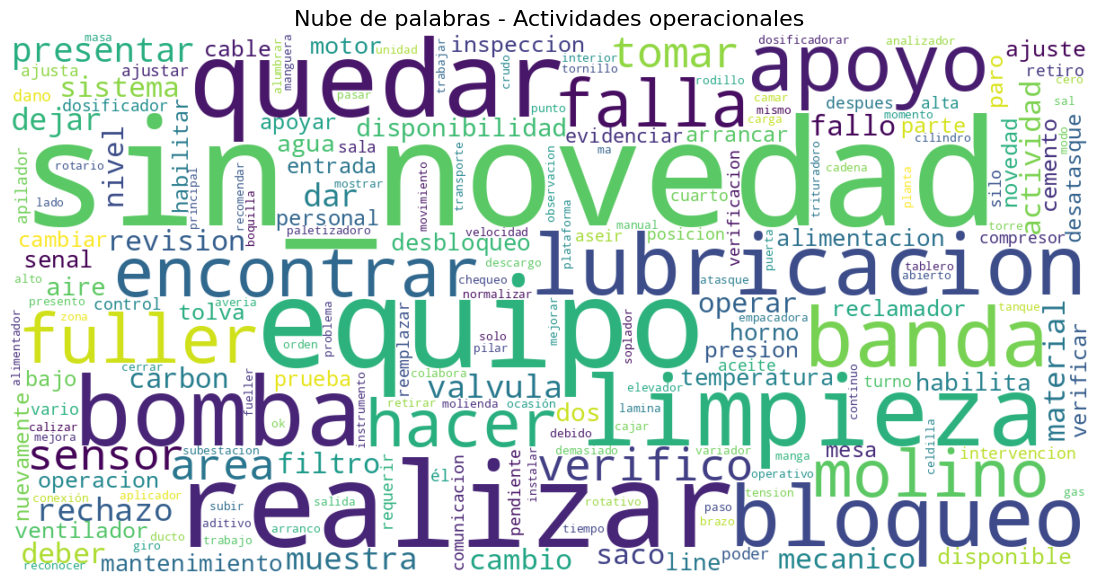

In [ ]:
# Crear una nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Lista de columnas de texto descriptivo
columnas_descripcion = [
    'Describa la actividad operacional # 1 del turno',
    'Describa la actividad operacional # 2 del turno',
    'Describa la actividad operacional # 3 del turno',
    'Describa la actividad operacional # 4 del turno',
    'Describa la actividad operacional # 5 del turno'
]

# Combinar todas las columnas en un solo texto plano
texto_completo = df_limpio[columnas_descripcion].astype(str).apply(lambda fila: ' '.join(fila), axis=1)
texto_completo = ' '.join(texto_completo)

# Crear la nube de palabras
nube = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    collocations=False  # evita combinaciones repetidas de palabras
).generate(texto_completo)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Actividades operacionales", fontsize=16)
plt.show()


<font face="Arial" size="4">

<b><font color="#1A5276">Gráfico de Barras: Frecuencia de Palabras</font></b><br>

Se genera un <font color="#117A65"><b>gráfico de barras</b></font> para visualizar la <font color="#117A65"><b>frecuencia de las palabras más comunes</b></font> encontradas en la columna <font color="#117A65"><b>descripción de la actividad</b></font>.<br>

Este gráfico permite identificar <font color="#117A65"><b>términos clave</b></font> utilizados con mayor regularidad por los técnicos, lo que facilita el análisis temático y el descubrimiento de patrones relevantes en los reportes industriales.

</font>


<ipython-input-82-0d2618902b2d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_frecuencias.head(20), x="Frecuencia", y="Palabra", palette="viridis")


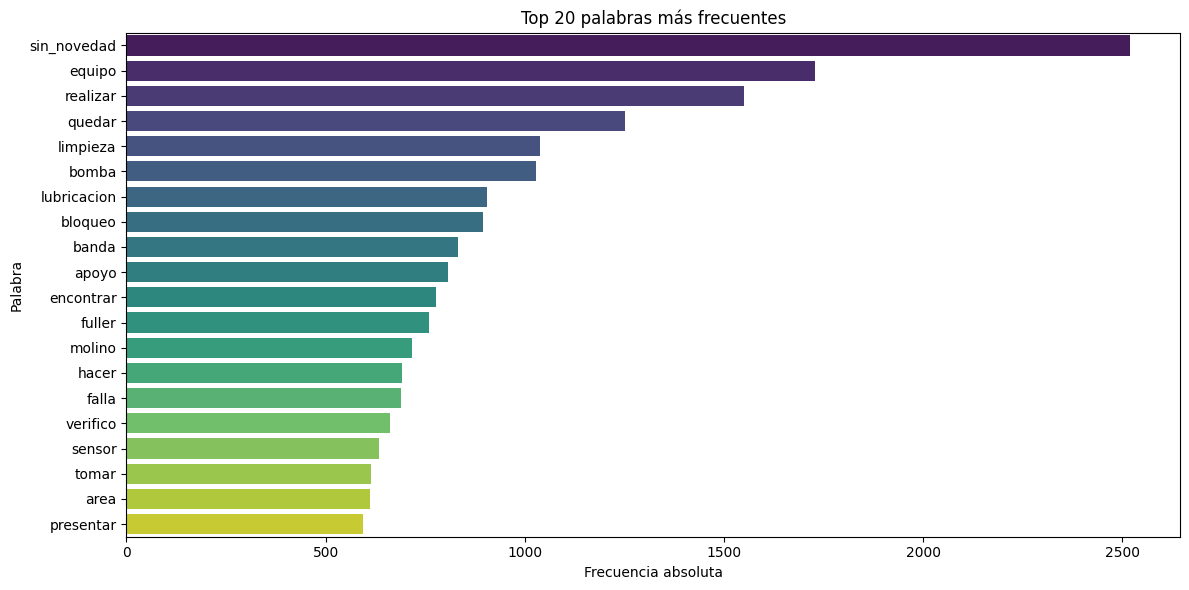

In [ ]:
# Grafico de barras con palabras mas frecuentes
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Columnas a usar
columnas_descripcion = [
  'Describa la actividad operacional # 1 del turno',
    'Describa la actividad operacional # 2 del turno',
    'Describa la actividad operacional # 3 del turno',
    'Describa la actividad operacional # 4 del turno',
    'Describa la actividad operacional # 5 del turno'
]

# Unir todas las columnas en un solo texto
texto_completo = df_limpio[columnas_descripcion].astype(str).apply(lambda fila: ' '.join(fila), axis=1)
texto_completo = ' '.join(texto_completo)

# Separar palabras y contar frecuencias
palabras = texto_completo.split()
frecuencias = Counter(palabras)



# Crear DataFrame de frecuencias absolutas
df_frecuencias = pd.DataFrame(frecuencias.items(), columns=["Palabra", "Frecuencia"])
df_frecuencias = df_frecuencias.sort_values(by="Frecuencia", ascending=False).reset_index(drop=True)

# Graficar las 20 palabras más frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(data=df_frecuencias.head(20), x="Frecuencia", y="Palabra", palette="viridis")
plt.title("Top 20 palabras más frecuentes")
plt.xlabel("Frecuencia absoluta")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()


<font face="Arial" size="4">

<b><font color="#1A5276">Nube de Palabras Aplicada a la Área donde se realizo la actividad operacional</font></b><br>

Una <font color="#117A65"><b>nube de palabras</b></font> es una representación visual de texto donde las palabras más frecuentes aparecen con mayor tamaño.<br>

Esta técnica se utiliza para <font color="#117A65"><b>identificar rápidamente los términos más relevantes o repetidos</b></font> dentro de un conjunto de datos textuales.<br>

Se aplica esta técnica a la columna <font color="#117A65"><b>Área donde se realizo la actividad operacional</b></font>, la cual nos muestra los Areas más mencionados por los técnicos en sus reportes, lo que permite obtener una visión general sobre donde ocurrieron fallos, actividades frecuentes en los procesos industriales.

</font>

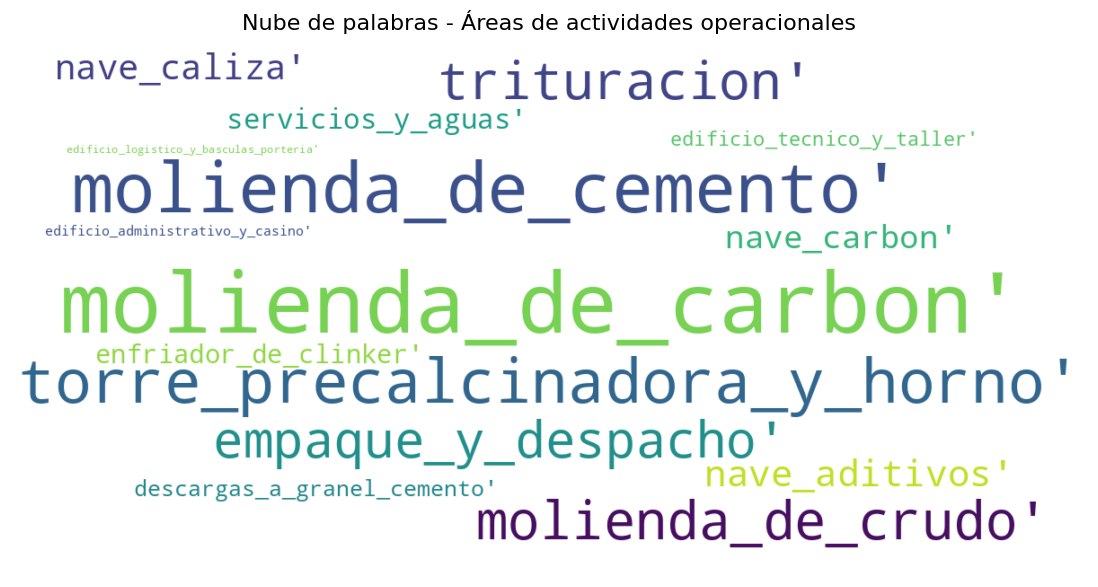

In [ ]:
# Nube de palabras
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Lista de columnas de texto descriptivo
columnas_descripcion = [
    'Área donde se realizo la actividad operacional # 1 del turno',
    'Área donde se realizo la actividad operacional # 2 del turno',
    'Área donde se realizo la actividad operacional # 3 del turno',
    'Área donde se realizo la actividad operacional # 4 del turno',
    'Área donde se realizo la actividad operacional # 5 del turno'
]

# Combinar todas las columnas en un solo texto plano
texto_completo = df_limpio[columnas_descripcion].astype(str).apply(lambda fila: ' '.join(fila), axis=1)
texto_completo = ' '.join(texto_completo)

# Agregar "no_registra" a las palabras que deben excluirse
stopwords = set(STOPWORDS)
stopwords.add("no_registra'")

# Crear la nube de palabras
nube = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='viridis',
    collocations=False,
    stopwords=stopwords
).generate(texto_completo)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 7))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras - Áreas de actividades operacionales", fontsize=16)
plt.show()


<font face="Arial" size="4">

<b><font color="#1A5276">Gráfico de Barras: Frecuencia de Palabras</font></b><br>

Se genera un <font color="#117A65"><b>gráfico de barras</b></font> para visualizar la <font color="#117A65"><b>frecuencia de las palabras más comunes</b></font> encontradas en la columna <font color="#117A65"><b>Área donde se realizo la actividad operacional</b></font>.<br>

Este gráfico permite identificar <font color="#117A65"><b>Areas clave</b></font> Frecuentadas con mayor regularidad por los técnicos, lo que facilita el análisis de las ubicaciones en los reportes industriales.

</font>

<ipython-input-84-17ded433b100>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_frecuencias.head(20), x="Frecuencia", y="Palabra", palette="viridis")


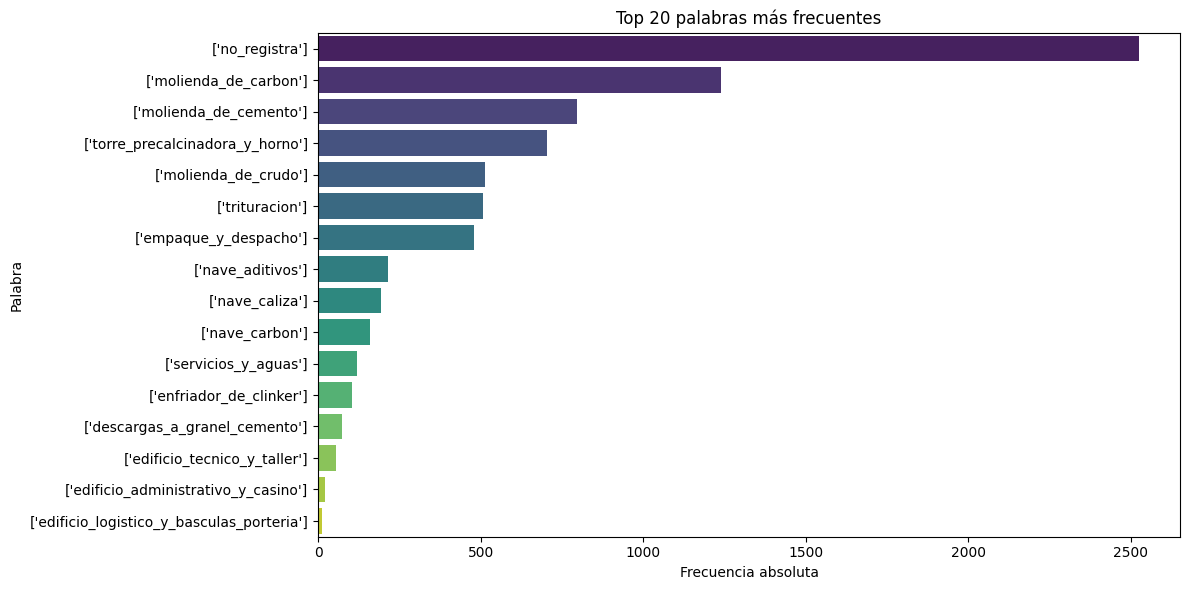

In [ ]:
# Grafico de barras con frecuencia de palabras
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Columnas a usar
columnas_descripcion = [
    'Área donde se realizo la actividad operacional # 1 del turno',
    'Área donde se realizo la actividad operacional # 2 del turno',
    'Área donde se realizo la actividad operacional # 3 del turno',
    'Área donde se realizo la actividad operacional # 4 del turno',
    'Área donde se realizo la actividad operacional # 5 del turno'
]

# Unir todas las columnas en un solo texto
texto_completo = df_limpio[columnas_descripcion].astype(str).apply(lambda fila: ' '.join(fila), axis=1)
texto_completo = ' '.join(texto_completo)

# Separar palabras y contar frecuencias
palabras = texto_completo.split()
frecuencias = Counter(palabras)



# Crear DataFrame de frecuencias absolutas
df_frecuencias = pd.DataFrame(frecuencias.items(), columns=["Palabra", "Frecuencia"])
df_frecuencias = df_frecuencias.sort_values(by="Frecuencia", ascending=False).reset_index(drop=True)

# Graficar las 20 palabras más frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(data=df_frecuencias.head(20), x="Frecuencia", y="Palabra", palette="viridis")
plt.title("Top 20 palabras más frecuentes")
plt.xlabel("Frecuencia absoluta")
plt.ylabel("Palabra")
plt.tight_layout()
plt.show()


<p>
  <font face="Arial" size="5" color="#1A5276"><b>APLICACION DEL MODELO LDA</b></font>
</p>

<font face="Arial" size="4">

Latent Dirichlet Allocation (LDA) es un modelo generativo probabilístico que busca identificar temas latentes en una colección de documentos. <font color="#117A65"><b>No requiere etiquetas ni conocimiento previo</b></font> de los textos: descubre patrones temáticos de forma automática.<br>


________________________________________________________________

<p>
  <font face="Arial" size="4" color="#1A5276"><b>TABLA REPORTE DE TRURNO ANTES DE LA APLICACION DEL MODELO LDA</b></font>
</p>


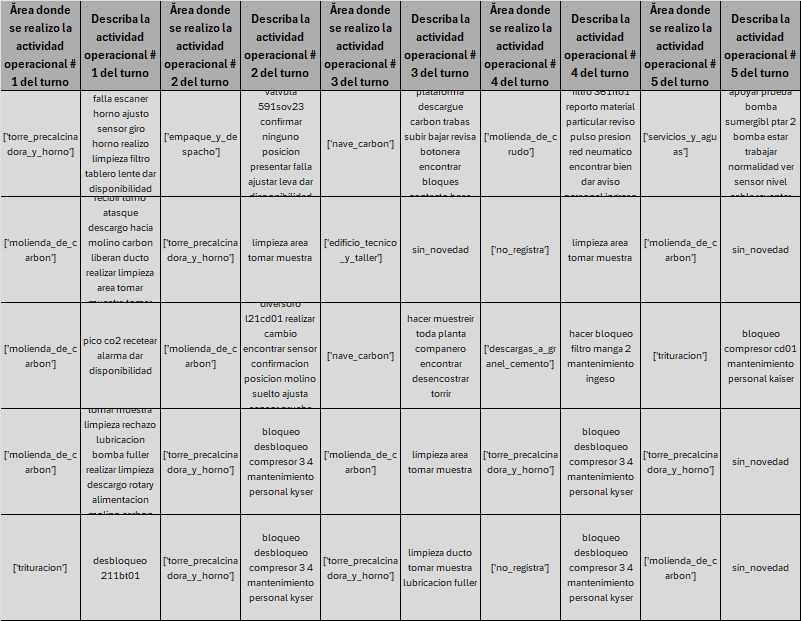

Para la aplicación de este modelo en el texto de los <font color="#117A65"><b>reportes de turno</b></font> se aplicaron una serie de pasos que se describen acontinuacion:

<font face="Arial" size="4">

<b><font color="#1A5276">1. Formación de los documentos</font></b><br>

Cada fila del dataset representa un <font color="#117A65"><b>reporte de turno</b></font>, el cual incluye descripciones de hasta 5 actividades realizadas en distintas áreas de una fábrica.<br>

Para formar los documentos:<br>
• Se <font color="#117A65"><b>concatenaron las descripciones</b></font> de actividades de cada turno en una sola cadena de texto por fila.<br>
• Esto produce un <font color="#117A65"><b>conjunto de documentos</b></font> (uno por turno), que reflejan las tareas y condiciones reportadas.

</font>
__________________________________________________________________________________________________________________________________

<font face="Arial" size="4">

<b><font color="#1A5276">2. Formación de la matriz (Bolsa de Palabras - BoW)</font></b><br>

Para alimentar el modelo LDA, se construyó una <font color="#117A65"><b>matriz de documentos y palabras</b></font> mediante estos pasos:<br><br>

• Se <font color="#117A65"><b>tokenizaron los documentos</b></font> (división en palabras).<br>
• Se <font color="#117A65"><b>eliminó ruido textual</b></font>: minúsculas, signos, palabras vacías, etc.<br>
• Se creó una <font color="#117A65"><b>matriz documento × término</b></font>, donde cada celda contiene la frecuencia de una palabra en un documento.<br>

Esta matriz es la <font color="#117A65"><b>representación numérica




________________________________________________________________________________________________________________________________________

<font face="Arial" size="4">

<b><font color="#1A5276">3. Aplicación del modelo LDA</font></b><br>

LDA es un <font color="#117A65"><b>modelo de inferencia probabilística</b></font> que:<br>

• Supone que <font color="#117A65"><b>cada documento es una mezcla de varios temas ocultos</b></font>.<br>
• Cada tema es una <font color="#117A65"><b>distribución de probabilidad sobre las palabras</b></font>.<br>
• Usa la distribución de <font color="#117A65"><b>Dirichlet</b></font> para:<br>
   - Asignar probabilidades a los <font color="#117A65"><b>temas dentro de cada documento</b></font>.<br>
   - Asignar probabilidades a las <font color="#117A65"><b>palabras dentro de cada tema</b></font>.<br>

<font color="#117A65"><b>Inferencia</b></font>:<br>
• El modelo ajusta sus distribuciones para encontrar <font color="#117A65"><b>qué temas explican mejor los patrones de coocurrencia de palabras</b></font> entre documentos.<br>
• En este caso se solicitó <font color="#117A65"><b>extraer 5 temas</b></font>.

</font>


________________________________________________________________________________________________________________________________________

In [ ]:
# Modelo NLP -Para la busqueda de los temas mas frecuentes en los reportes
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# 1. Asegúrate de tener las stopwords en español
nltk.download('stopwords')
stopwords_es = stopwords.words('spanish')

mis_stopwords = stopwords_es + ['dar', 'dos', 'deber', 'quedar','actividad' ]
vectorizer = CountVectorizer(stop_words=mis_stopwords)


# 2. Combinar descripciones (listas de tokens) en un solo texto
cols_actividades = [
    'Describa la actividad operacional # 1 del turno',
    'Describa la actividad operacional # 2 del turno',
    'Describa la actividad operacional # 3 del turno',
    'Describa la actividad operacional # 4 del turno',
    'Describa la actividad operacional # 5 del turno'
]

def unir_tokens(celda):
    if isinstance(celda, list):
        return ' '.join(celda)
    return str(celda)

df_limpio['actividades_combinadas'] = (
    df_limpio[cols_actividades]
    .applymap(unir_tokens)
    .agg(' '.join, axis=1)
)

# 3. Vectorizar con la lista de stopwords en español
vectorizer = CountVectorizer(
    max_df=0.90,
    min_df=2,
    stop_words=mis_stopwords
)
tf_matrix = vectorizer.fit_transform(df_limpio['actividades_combinadas'])

# 4. Entrenar LDA para extraer temas
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tf_matrix)

# 5. Mostrar las 10 palabras principales de cada tema
def mostrar_temas(model, feature_names, n_top):
    temas = {}
    for i, comp in enumerate(model.components_):
        mejores = [feature_names[j] for j in comp.argsort()[:-n_top-1:-1]]
        temas[f"Tema {i+1}"] = mejores
    return pd.DataFrame(temas)

feature_names = vectorizer.get_feature_names_out()
df_temas = mostrar_temas(lda, feature_names, 10)
print(df_temas)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-85-7c4b926b2458>:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(unir_tokens)


        Tema 1       Tema 2          Tema 3     Tema 4    Tema 5
0        hacer  sin_novedad        realizar     equipo  verifico
1        falla        tomar           hacer      apoyo  realizar
2  sin_novedad  lubricacion        revision   realizar    equipo
3     revision     limpieza          sensor      banda  habilita
4        motor      muestra           falla  encontrar   bloqueo
5        bomba       fuller  disponibilidad      bomba     falla
6       equipo        bomba          equipo   limpieza    molino
7        banda      rechazo       presentar      fallo     banda
8     limpieza         area            saco    valvula   cemento
9    presentar     realizar     sin_novedad    bloqueo    carbon


<font face="Arial" size="4">

<b><font color="#1A5276">Extracción de temas</font></b><br>

El modelo LDA <font color="#117A65"><b>identificó los 5 temas principales</b></font> con base en las palabras que aparecen juntas con más frecuencia en los documentos.<br>

Estas agrupaciones reflejan <font color="#117A65"><b>tareas y focos operacionales comunes</b></font> en los turnos industriales.

</font>

_______________________________________________________________________________________________________________________________________

<font face="Arial" size="4">

<b><font color="#1A5276">Análisis de los temas identificados</font></b><br><br>

• <font color="#117A65"><b>Tema 1</b></font> podría estar relacionado con bloqueos o verificación de equipos.<br><br>
• <font color="#117A65"><b>Tema 2</b></font> parece vinculado a tareas operativas generales o disponibilidad.<br><br>
• <font color="#117A65"><b>Tema 3</b></font> apunta a acciones correctivas o mantenimiento.<br><br>
• <font color="#117A65"><b>Tema 4</b></font> parece asociarse con apoyo operativo o fallos en el equipo.<br><br>
• <font color="#117A65"><b>Tema 5</b></font> incluye muchos términos de rutina o sin novedad ("sin_novedad", "lubricacion", "muestra").

</font>




________________________________________________________________________________________________________________________________________

<p>
  <font face="Arial" size="5" color="#1A5276"><b>GRAFICAS DE RESULTADOS DEL MODELO</b></font>
</p>



<font face="Arial" size="4">

<b><font color="#1A5276">Conteo de reportes por tema dominante</font></b><br>

Se calcularon los números de reportes por <font color="#117A65"><b>tema dominante</b></font> para poder determinar qué tema es el más concurrido en la operación de la fábrica.<br>

Este análisis permite identificar <font color="#117A65"><b>el enfoque principal</b></font> de los turnos operacionales, y con ello <font color="#117A65"><b>priorizar acciones</b></font> de mantenimiento, inspección o soporte según la frecuencia temática observada.

</font>


In [ ]:
# Obtener distribución de temas por documento
df_topics = lda.transform(tf_matrix)

# Tema dominante por fila
df_limpio['tema_dominante'] = df_topics.argmax(axis=1)

# Ver cuántos reportes caen en cada tema
df_limpio['tema_dominante'].value_counts()


,count
tema_dominante,
1,393
3,393
4,343
2,312
0,103


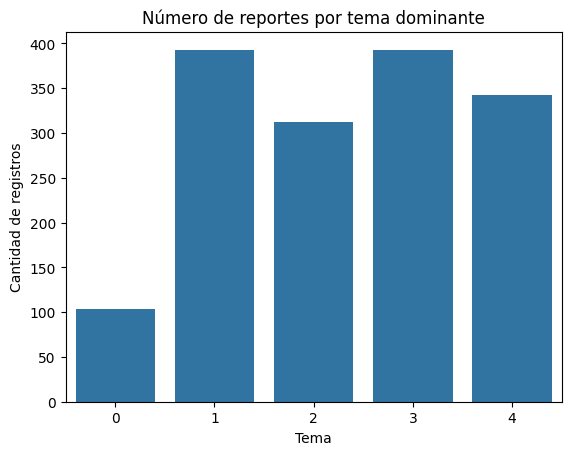

In [ ]:
# Grafico de barras para deteccion de la frecuencia de los temas
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='tema_dominante', data=df_limpio)
plt.title('Número de reportes por tema dominante')
plt.xlabel('Tema')
plt.ylabel('Cantidad de registros')
plt.show()


<font face="Arial" size="5">



| <font color="#117A65"><b>Tema 0</b></font> | <font color="#117A65"><b>Tema 1</b></font> | <font color="#117A65"><b>Tema 2</b></font> | <font color="#117A65"><b>Tema 3</b></font> | <font color="#117A65"><b>Tema 4</b></font> |
|:--:|:--:|:--:|:--:|:--:|
| Bloqueos o verificación de equipos | Tareas operativas generales o disponibilidad | Acciones correctivas o mantenimiento | Apoyo operativo o fallos en el equipo | Tareas rutinarias o sin novedad |

</font>


<font face="Arial" size="4">

<b><font color="#1A5276">Conteo de palabras clave por tema</font></b><br>

Cada barra representa una palabra clave dentro de un tema. Su longitud (peso) indica cuán representativa es esa palabra para el tema.<br>

<font color="#117A65"><b>Detectar fácilmente</b></font> acciones comunes como limpieza, bloqueo, ajustar, cambio, etc.<br>

<font color="#117A65"><b>Identificar</b></font> lugares o equipos recurrentes como bomba, molino, plataforma, horno, etc.<br>

<font color="#117A65"><b>Reconocer patrones operacionales</b></font> para tomar decisiones sobre mantenimiento, recursos o entrenamientos.

</font>


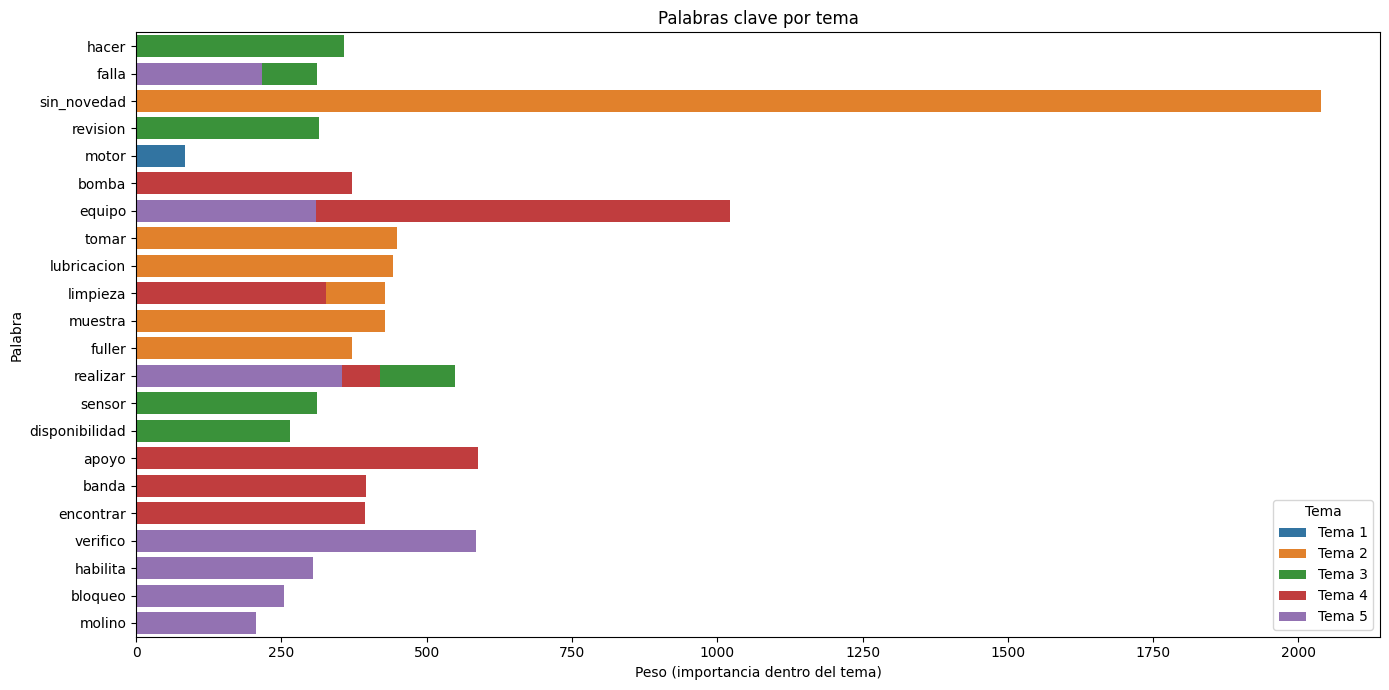

In [ ]:
# Grafico de palabras claves por tema
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_temas(lda_model, vectorizer, n_top_palabras=10):
    feature_names = vectorizer.get_feature_names_out()
    temas = []

    for idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[-n_top_palabras:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]
        for palabra, peso in zip(top_words, top_weights):
            temas.append({
                "Tema": f"Tema {idx + 1}",
                "Palabra": palabra,
                "Peso": peso
            })

    df_temas = pd.DataFrame(temas)

    # Graficar
    plt.figure(figsize=(14, 7))
    sns.barplot(
        data=df_temas,
        x="Peso", y="Palabra", hue="Tema",
        dodge=False
    )
    plt.title("Palabras clave por tema")
    plt.xlabel("Peso (importancia dentro del tema)")
    plt.ylabel("Palabra")
    plt.legend(title="Tema")
    plt.tight_layout()
    plt.show()

# Ejecutar la función
graficar_temas(lda, vectorizer, n_top_palabras=7)


<font face="Arial" size="5">



| <font color="#117A65"><b>Tema 1</b></font> | <font color="#117A65"><b>Tema 2</b></font> | <font color="#117A65"><b>Tema 3</b></font> | <font color="#117A65"><b>Tema 4</b></font> | <font color="#117A65"><b>Tema 5</b></font> |
|:--:|:--:|:--:|:--:|:--:|
| Bloqueos o verificación de equipos | Tareas operativas generales o disponibilidad | Acciones correctivas o mantenimiento | Apoyo operativo o fallos en el equipo | Tareas rutinarias o sin novedad |

</font>


<font face="Arial" size="4">

<b><font color="#1A5276">Conteo de áreas más frecuentes por tema</font></b><br>

Esta gráfica muestra cómo se distribuyen las <font color="#117A65"><b>áreas operacionales</b></font> más reportadas dentro de cada uno de los temas identificados por el modelo LDA.<br>

Cada barra representa una <font color="#117A65"><b>frecuencia de aparición</b></font> de un área específica dentro de un tema.<br><br>

Esto permite:<br>

•	<font color="#117A65"><b>Detectar qué zonas</b></font> están más asociadas a actividades críticas o rutinarias.<br>
•	<font color="#117A65"><b>Relacionar áreas con tipos de tareas</b></font> como mantenimiento, limpieza, bloqueo o inspección.<br>
•	<font color="#117A65"><b>Apoyar la toma de decisiones</b></font> sobre priorización de recursos humanos y técnicos.<br>
•	<font color="#117A65"><b>Visualizar puntos críticos</b></font> dentro del proceso industrial donde ocurren más eventos.<br>

Esta información es clave para <font color="#117A65"><b>optimizar la operación</b></font>, asignar personal de forma más estratégica y prevenir fallas mediante acciones preventivas bien dirigidas.

</font>



<ipython-input-90-7dfc4d1b2404>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_limpio['areas_combinadas'] = df_limpio[cols_areas].applymap(limpiar_area).agg(sum, axis=1)
<ipython-input-90-7dfc4d1b2404>:25: FutureWarning: The provided callable <built-in function sum> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_limpio['areas_combinadas'] = df_limpio[cols_areas].applymap(limpiar_area).agg(sum, axis=1)


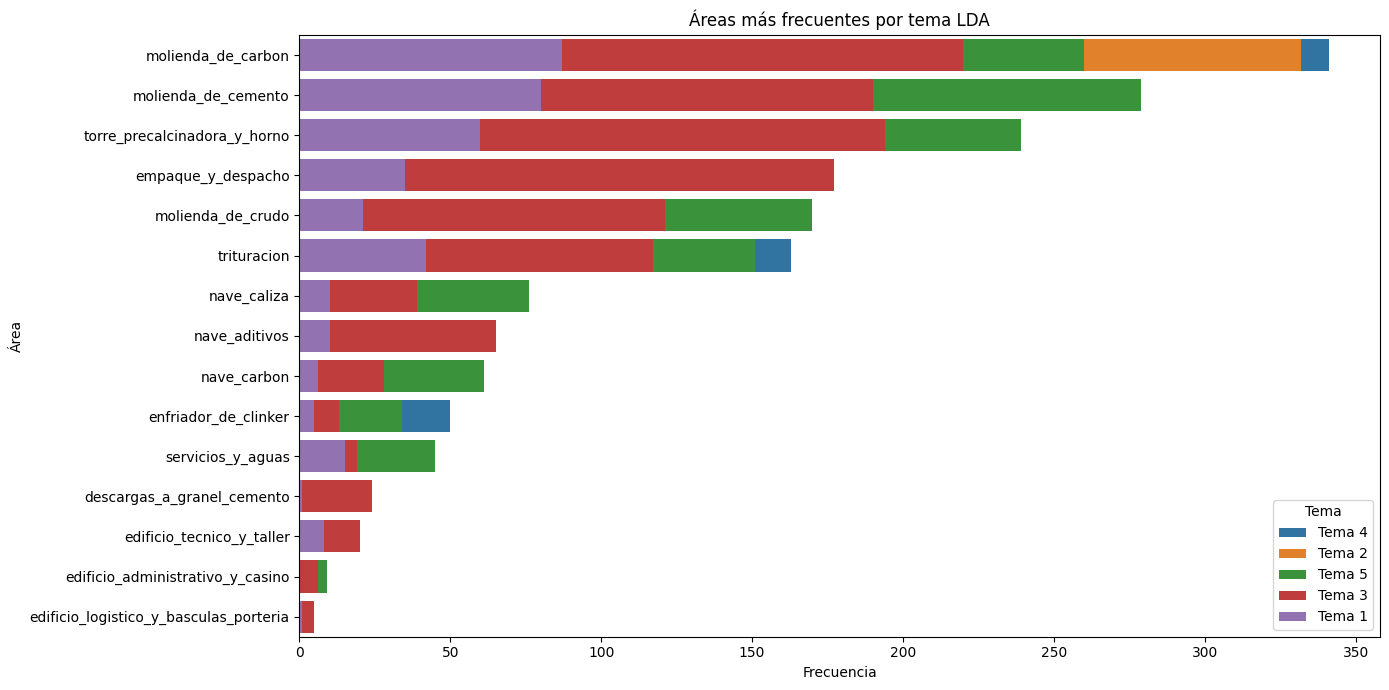

In [ ]:
# Grafico de barras de areas mas frecuentes por tema lda
from collections import defaultdict
import ast

# Paso 1: Unir las columnas de área
cols_areas = [
    'Área donde se realizo la actividad operacional # 1 del turno',
    'Área donde se realizo la actividad operacional # 2 del turno',
    'Área donde se realizo la actividad operacional # 3 del turno',
    'Área donde se realizo la actividad operacional # 4 del turno',
    'Área donde se realizo la actividad operacional # 5 del turno',
]

# Normalizar formato (de lista de strings a strings planos)
def limpiar_area(celda):
    if isinstance(celda, list):
        return [a.strip().lower() for a in celda]
    try:
        celda = ast.literal_eval(celda)  # convertir de str a list
        return [a.strip().lower() for a in celda]
    except:
        return ['no_registra']

# Aplicar limpieza
df_limpio['areas_combinadas'] = df_limpio[cols_areas].applymap(limpiar_area).agg(sum, axis=1)

# Paso 2: Obtener el tema dominante de cada fila
temas_documento = lda.transform(tf_matrix)
temas_maximos = temas_documento.argmax(axis=1)
df_limpio['tema_dominante'] = temas_maximos

# Paso 3: Contar frecuencia de áreas por tema
conteo_areas = defaultdict(lambda: defaultdict(int))

for idx, fila in df_limpio.iterrows():
    tema = fila['tema_dominante']
    for area in fila['areas_combinadas']:
        conteo_areas[tema][area] += 1

# Paso 4: Convertir a DataFrame para graficar
datos_areas = []

for tema, areas in conteo_areas.items():
    for area, conteo in areas.items():
        if area != 'no_registra':
            datos_areas.append({
                "Tema": f"Tema {tema + 1}",
                "Área": area,
                "Frecuencia": conteo
            })

df_areas = pd.DataFrame(datos_areas)

# Paso 5: Graficar
plt.figure(figsize=(14, 7))
sns.barplot(data=df_areas.sort_values("Frecuencia", ascending=False),
            x="Frecuencia", y="Área", hue="Tema", dodge=False)
plt.title("Áreas más frecuentes por tema LDA")
plt.xlabel("Frecuencia")
plt.ylabel("Área")
plt.legend(title="Tema")
plt.tight_layout()
plt.show()


<font face="Arial" size="5">



| <font color="#117A65"><b>Tema 1</b></font> | <font color="#117A65"><b>Tema 2</b></font> | <font color="#117A65"><b>Tema 3</b></font> | <font color="#117A65"><b>Tema 4</b></font> | <font color="#117A65"><b>Tema 5</b></font> |
|:--:|:--:|:--:|:--:|:--:|
| Bloqueos o verificación de equipos | Tareas operativas generales o disponibilidad | Acciones correctivas o mantenimiento | Apoyo operativo o fallos en el equipo | Tareas rutinarias o sin novedad |

</font>


<font face="Arial" size="4">

<b><font color="#1A5276">Conteo de técnicos por área de intervención</font></b><br>

Esta visualización muestra el <font color="#117A65"><b>número de veces que cada técnico ha intervenido en distintas áreas</b></font> de la planta industrial.<br><br>

Permite analizar:<br>

•	<font color="#117A65"><b>Distribución de la carga laboral</b></font>: saber si algunos técnicos están concentrados en zonas específicas o si existe rotación.<br>
•	<font color="#117A65"><b>Especialización técnica</b></font>: identificar si ciertos técnicos realizan más actividades en áreas críticas como molienda, torre o crudo.<br>
•	<font color="#117A65"><b>Toma de decisiones</b></font>: útil para asignar personal, balancear equipos de trabajo o planear <font color="#117A65"><b>capacitaciones estratégicas</b></font> según la frecuencia de intervención.<br>


</font>


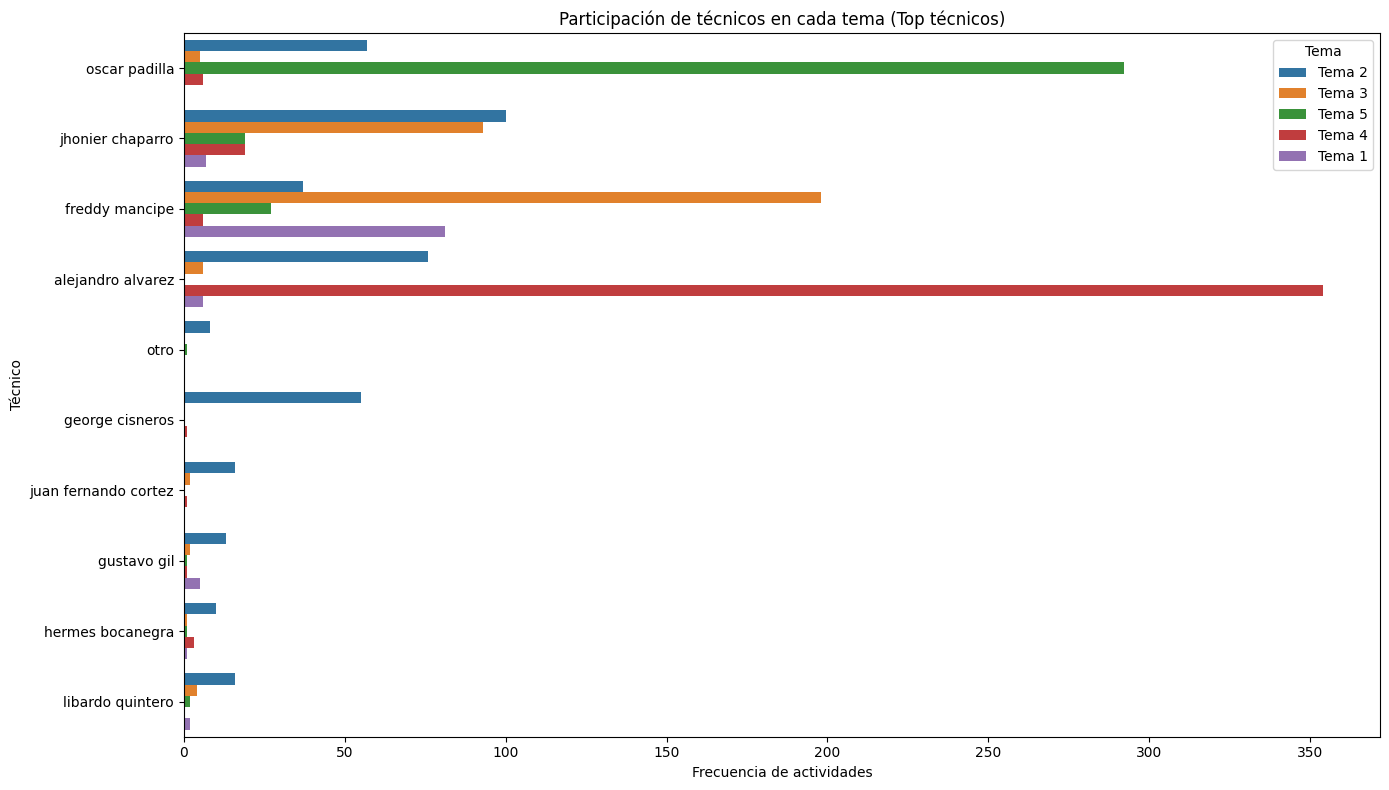

In [ ]:
# participacion tecnicos en cada tema
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 1: Contar técnicos por tema
conteo_tecnicos = defaultdict(lambda: defaultdict(int))

for idx, fila in df_limpio.iterrows():
    tema = fila['tema_dominante']
    tecnico = fila['Nombre Técnico Turno']
    if pd.notna(tecnico) and tecnico != 'no_registra':
        conteo_tecnicos[tema][tecnico] += 1

# Paso 2: Convertir a DataFrame para graficar
datos_tecnicos = []

for tema, tecnicos in conteo_tecnicos.items():
    for tecnico, conteo in tecnicos.items():
        datos_tecnicos.append({
            "Tema": f"Tema {tema + 1}",
            "Nombre Técnico Turno": tecnico,
            "Frecuencia": conteo
        })

tabla_tecnicos_por_tema = pd.DataFrame(datos_tecnicos)

# Paso 3: Seleccionar los técnicos más frecuentes
top_tecnicos = (
    tabla_tecnicos_por_tema
    .groupby("Nombre Técnico Turno")["Frecuencia"]
    .sum()
    .sort_values(ascending=False)
    .head(10)  # Puedes ajustar el número de técnicos
    .index
)

# Paso 4: Filtrar solo esos técnicos
df_viz = tabla_tecnicos_por_tema[
    tabla_tecnicos_por_tema["Nombre Técnico Turno"].isin(top_tecnicos)
]

# Paso 5: Graficar
plt.figure(figsize=(14, 8))
sns.barplot(
    data=df_viz,
    x="Frecuencia",
    y="Nombre Técnico Turno",
    hue="Tema",
    dodge=True
)

plt.title("Participación de técnicos en cada tema (Top técnicos)")
plt.xlabel("Frecuencia de actividades")
plt.ylabel("Técnico")
plt.legend(title="Tema")
plt.tight_layout()
plt.show()


<font face="Arial" size="5">



| <font color="#117A65"><b>Tema 1</b></font> | <font color="#117A65"><b>Tema 2</b></font> | <font color="#117A65"><b>Tema 3</b></font> | <font color="#117A65"><b>Tema 4</b></font> | <font color="#117A65"><b>Tema 5</b></font> |
|:--:|:--:|:--:|:--:|:--:|
| Bloqueos o verificación de equipos | Tareas operativas generales o disponibilidad | Acciones correctivas o mantenimiento | Apoyo operativo o fallos en el equipo | Tareas rutinarias o sin novedad |

</font>


<font face="Arial" size="4">

<b><font color="#1A5276">Heatmap de participación de técnicos por tema</font></b><br><br>

Este mapa de calor presenta la <font color="#117A65"><b>frecuencia de intervención de cada técnico en los cinco temas principales</b></font> identificados mediante el modelo LDA. Cada fila representa un técnico y cada columna un tema; la intensidad del color indica el número de reportes en los que el técnico ha participado dentro de ese tema.<br><br>

Esta visualización permite:<br><br>

• <font color="#117A65"><b>Detectar técnicos polivalentes</b></font> que participan en varios o en todos los temas, lo cual puede indicar experiencia o versatilidad.<br><br>

• <font color="#117A65"><b>Identificar técnicos especializados</b></font> que concentran su actividad en uno o dos temas específicos, como mantenimiento, fallas o rutina operativa.<br><br>

• <font color="#117A65"><b>Evaluar la distribución del trabajo</b></font>: los temas con mayor intensidad global indican más carga operativa o necesidad de atención frecuente.<br><br>

• <font color="#117A65"><b>Detectar posibles brechas</b></font>: temas con baja participación técnica podrían estar subatendidos, lo que señala oportunidades para reforzar personal o capacitar.<br><br>

Este análisis es clave para la <font color="#117A65"><b>gestión del talento humano</b></font>: permite tomar decisiones estratégicas sobre rotación, especialización, reasignación o entrenamientos, alineando los recursos técnicos con las necesidades operacionales detectadas.

</font>


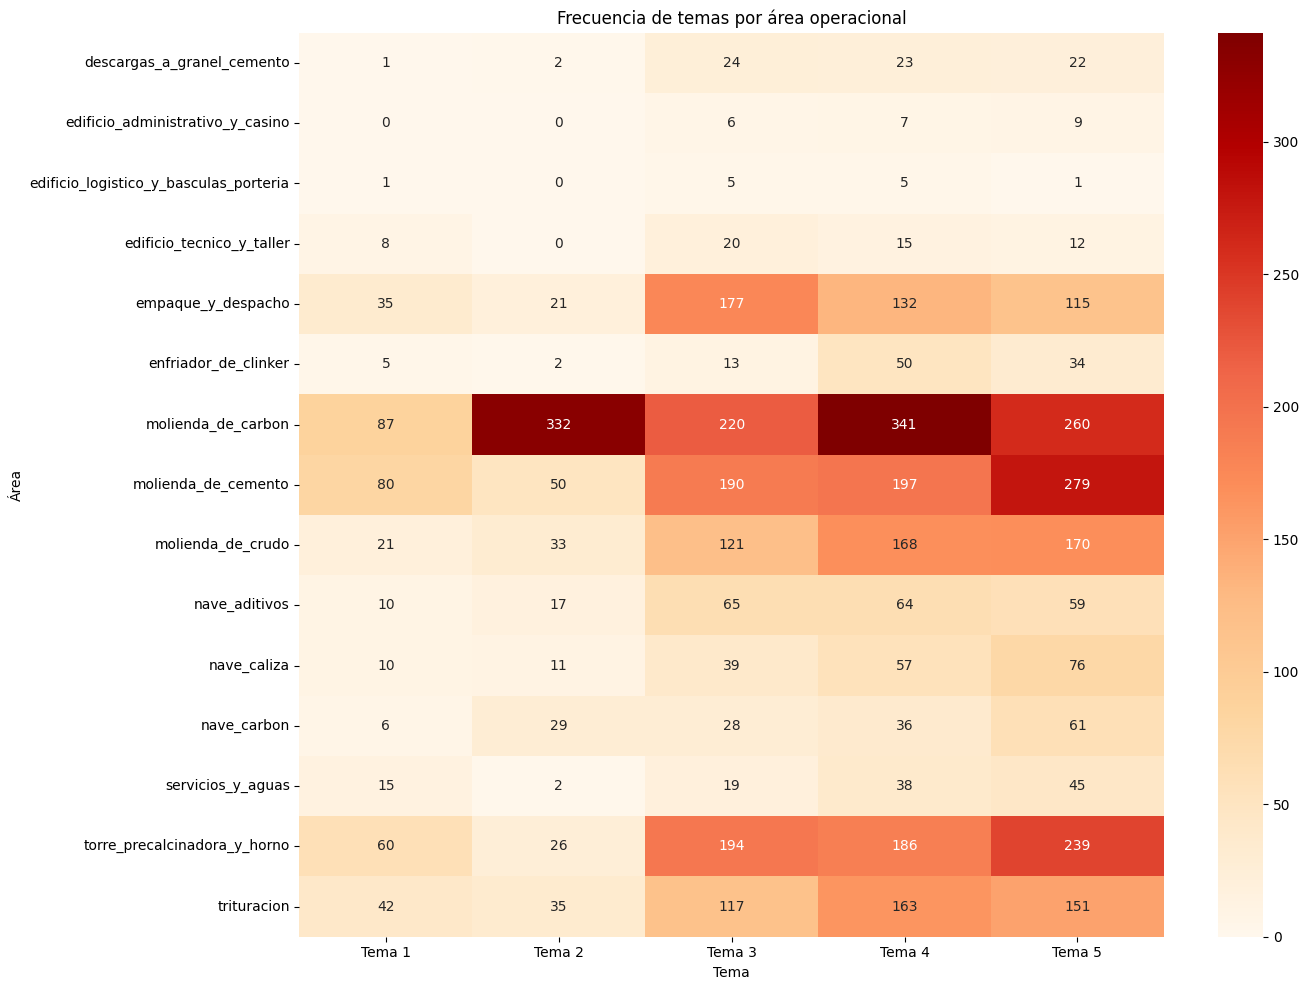

In [ ]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Expandir filas para que cada combinación Tema-Área sea una fila independiente
registros = []

for idx, fila in df_limpio.iterrows():
    tema = fila['tema_dominante']
    for area in fila['areas_combinadas']:
        if area and area != 'no_registra':
            registros.append({
                'Tema': f"Tema {tema + 1}",  # Etiqueta legible
                'Área': area
            })

# Paso 2: Crear DataFrame para el cruce
df_cruce = pd.DataFrame(registros)

# Paso 3: Crear tabla cruzada (pivot)
pivot_temas_areas = (
    df_cruce.groupby(['Tema', 'Área'])
    .size()
    .unstack(fill_value=0)  # Rellena con 0 donde no hay datos
    .T  # Transponer para que las áreas estén en el eje Y
    .sort_index()
)

# Paso 4: Visualización Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_temas_areas, annot=True, fmt='d', cmap='OrRd')
plt.title("Frecuencia de temas por área operacional")
plt.xlabel("Tema")
plt.ylabel("Área")
plt.tight_layout()
plt.show()


<font face="Arial" size="5">



| <font color="#117A65"><b>Tema 1</b></font> | <font color="#117A65"><b>Tema 2</b></font> | <font color="#117A65"><b>Tema 3</b></font> | <font color="#117A65"><b>Tema 4</b></font> | <font color="#117A65"><b>Tema 5</b></font> |
|:--:|:--:|:--:|:--:|:--:|
| Bloqueos o verificación de equipos | Tareas operativas generales o disponibilidad | Acciones correctivas o mantenimiento | Apoyo operativo o fallos en el equipo | Tareas rutinarias o sin novedad |

</font>
